# Master Thesis

# Evaluating the robustness of Machine Learning Model 

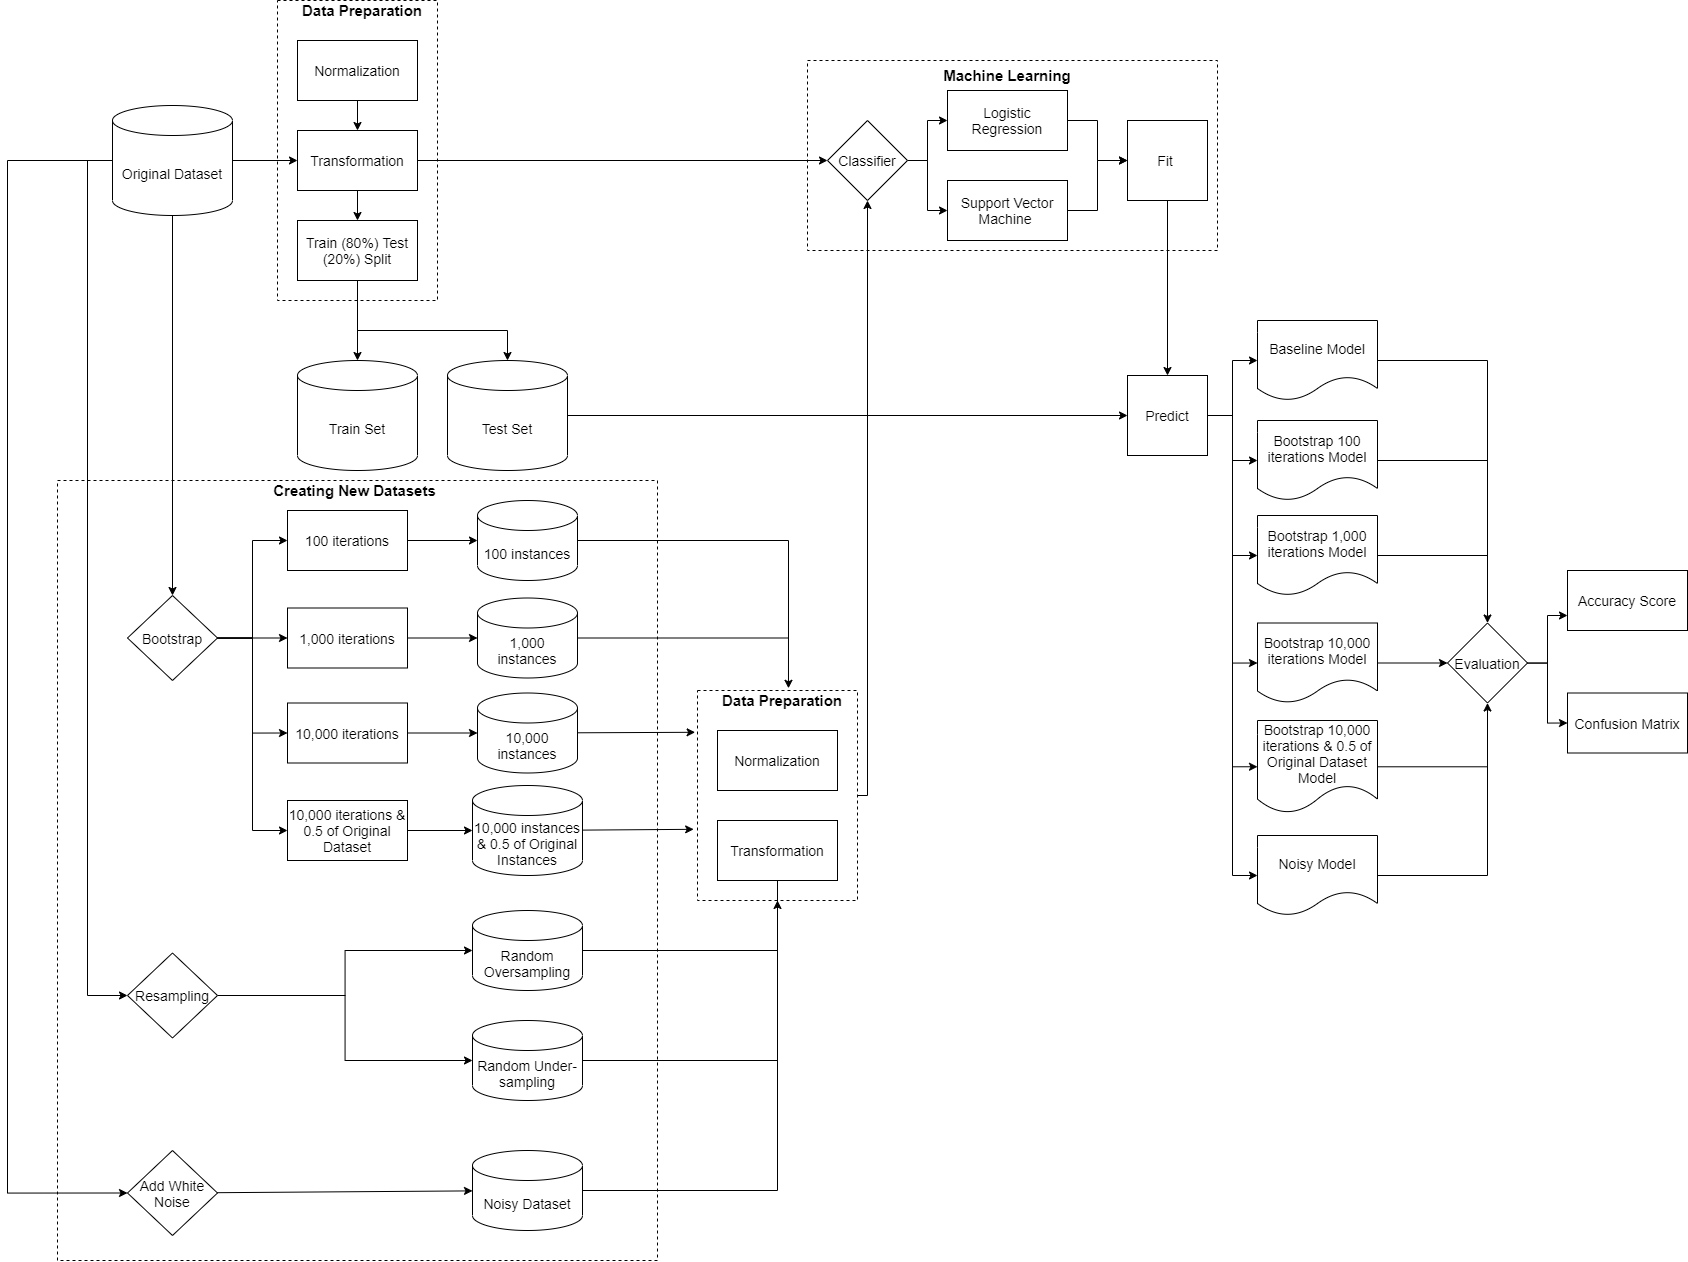

# Import all the relevant packages

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from yellowbrick.classifier import ClassificationReport
from sklearn.svm import SVC
from sklearn.utils import resample

# Import German Credit Dataset

In [2]:
file = "C:/Users/Drago/iCloudDrive/Documents/Documents - Mike’s MacBook Pro/Master/Thesis/Datasets/GC/german.data"

url = "http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"

names = ['existingchecking', 'duration', 'credithistory', 'purpose', 'creditamount',
         'savings', 'pre_employmentsince', 'installmentrate', 'status_sex', 'otherdebtors',
         'pre_residencesince', 'property', 'age', 'otherinstallmentplans', 'housing',
         'existingcredits', 'job', 'peopleliable', 'telephone', 'foreignworker', 'classification']

# Data Exploration

## Glimpse on dataset

In [3]:
germany = pd.read_csv(file,names = names, delimiter=' ')
print(germany.shape)
print (germany.columns)
germany.head(10)

(1000, 21)
Index(['existingchecking', 'duration', 'credithistory', 'purpose',
       'creditamount', 'savings', 'pre_employmentsince', 'installmentrate',
       'status_sex', 'otherdebtors', 'pre_residencesince', 'property', 'age',
       'otherinstallmentplans', 'housing', 'existingcredits', 'job',
       'peopleliable', 'telephone', 'foreignworker', 'classification'],
      dtype='object')


,existingchecking,duration,credithistory,purpose,creditamount,savings,pre_employmentsince,installmentrate,status_sex,otherdebtors,...,property,age,otherinstallmentplans,housing,existingcredits,job,peopleliable,telephone,foreignworker,classification
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
5,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1
6,A14,24,A32,A42,2835,A63,A75,3,A93,A101,...,A122,53,A143,A152,1,A173,1,A191,A201,1
7,A12,36,A32,A41,6948,A61,A73,2,A93,A101,...,A123,35,A143,A151,1,A174,1,A192,A201,1
8,A14,12,A32,A43,3059,A64,A74,2,A91,A101,...,A121,61,A143,A152,1,A172,1,A191,A201,1
9,A12,30,A34,A40,5234,A61,A71,4,A94,A101,...,A123,28,A143,A152,2,A174,1,A191,A201,2


In [4]:
germany.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   existingchecking       1000 non-null   object
 1   duration               1000 non-null   int64 
 2   credithistory          1000 non-null   object
 3   purpose                1000 non-null   object
 4   creditamount           1000 non-null   int64 
 5   savings                1000 non-null   object
 6   pre_employmentsince    1000 non-null   object
 7   installmentrate        1000 non-null   int64 
 8   status_sex             1000 non-null   object
 9   otherdebtors           1000 non-null   object
 10  pre_residencesince     1000 non-null   int64 
 11  property               1000 non-null   object
 12  age                    1000 non-null   int64 
 13  otherinstallmentplans  1000 non-null   object
 14  housing                1000 non-null   object
 15  existingcredits       

- Observations: 1000 rows and 15 features, object (string) and integer, no null values


In [5]:
germany.describe()

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,classification
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


## Modify classification column into the binary: 2 -> 1= bad , 1 -> 0 = good

In [6]:
germany.classification.replace([1,2], [0,1], inplace=True)

In [7]:
germany.head(3)

,existingchecking,duration,credithistory,purpose,creditamount,savings,pre_employmentsince,installmentrate,status_sex,otherdebtors,...,property,age,otherinstallmentplans,housing,existingcredits,job,peopleliable,telephone,foreignworker,classification
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,0
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,1
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,0


## Print if it is replaced correctly and count number of good (700) & bad (300) credit

In [8]:
germany.classification.value_counts()

0    700
1    300
Name: classification, dtype: int64

Text(0, 0.5, 'Frequency')

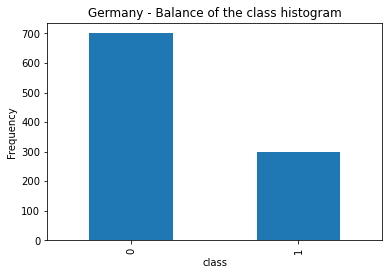

In [9]:
pd.value_counts(germany['classification']).plot.bar()
plt.title('Germany - Balance of the class histogram')
plt.xlabel('class')
plt.ylabel('Frequency')

- Good credit has 700 instances and Bad credit has 300 instances
- This dataset is imbalanced - quite mild

# Exploratory Data Analysis

## Distribution of numerical variables - Histogram

## Duration

Text(0, 0.5, 'Frequency')

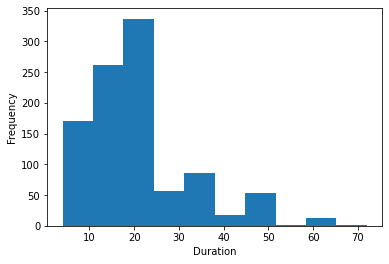

In [10]:
duration_column = germany['duration']
plt.hist(duration_column)
plt.xlabel('Duration')
plt.ylabel('Frequency')

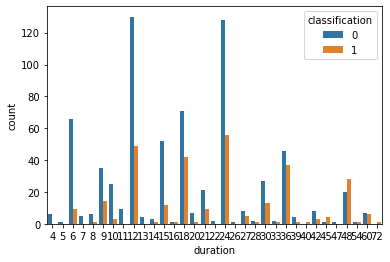

In [11]:
sns.countplot(x='duration', data=germany,hue='classification')

## Creditamount

Text(0, 0.5, 'Frequency')

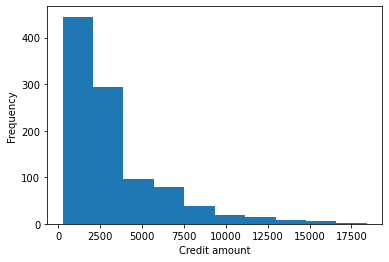

In [12]:
creditamount_column = germany['creditamount']
plt.hist(creditamount_column)
plt.xlabel('Credit amount')
plt.ylabel('Frequency')

- Majority of people have credit amount less than 8000

## Installmentrate

Text(0, 0.5, 'Frequency')

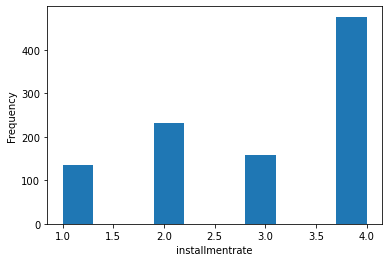

In [13]:
installmentrate_column = germany['installmentrate']
plt.hist(installmentrate_column)
plt.xlabel('installmentrate')
plt.ylabel('Frequency')

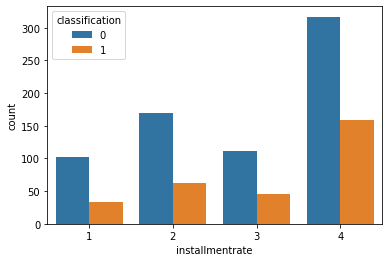

In [14]:
sns.countplot(x='installmentrate', data=germany, hue='classification')

## Pre Residencesince

Text(0, 0.5, 'Frequency')

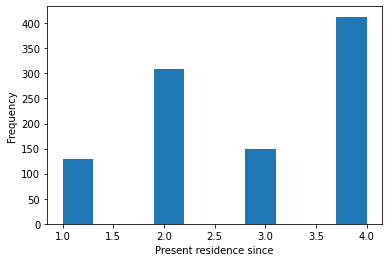

In [15]:
pre_residencesince_column = germany['pre_residencesince']
plt.hist(pre_residencesince_column)
plt.xlabel('Present residence since')
plt.ylabel('Frequency')

## Age

Text(0, 0.5, 'Frequency')

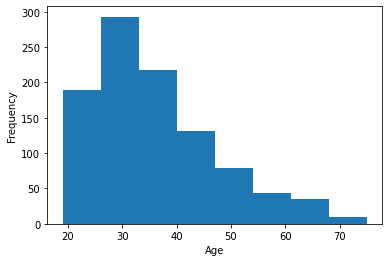

In [16]:
age_column = germany['age']
plt.hist(age_column, bins=8)
plt.xlabel('Age')
plt.ylabel('Frequency')

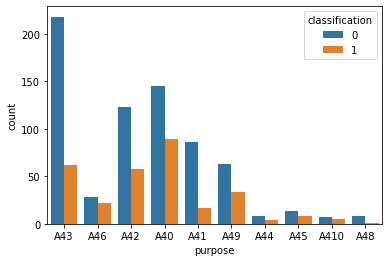

In [17]:
sns.countplot(x='purpose', data=germany, hue='classification')

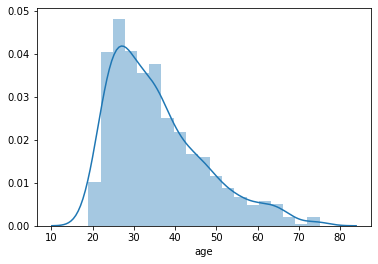

In [18]:
sns.distplot(germany['age'])
plt.show()

## Existingcredits

Text(0, 0.5, 'Frequency')

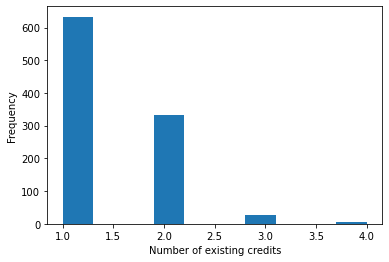

In [19]:
existingcredits_column = germany['existingcredits']
plt.hist(existingcredits_column)
plt.xlabel('Number of existing credits')
plt.ylabel('Frequency')

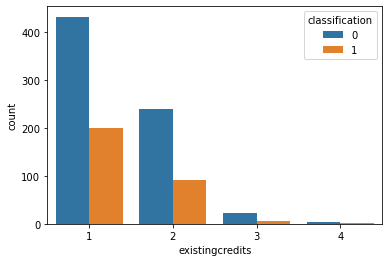

In [20]:
sns.countplot(x='existingcredits', data=germany,hue='classification')

## Peopleliable

Text(0, 0.5, 'Frequency')

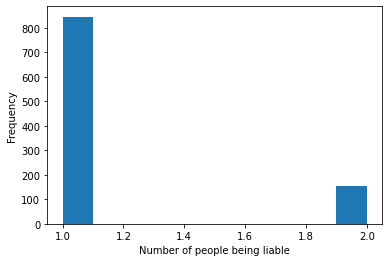

In [21]:
peopleliable_column = germany['peopleliable']
plt.hist(peopleliable_column)
plt.xlabel('Number of people being liable')
plt.ylabel('Frequency')

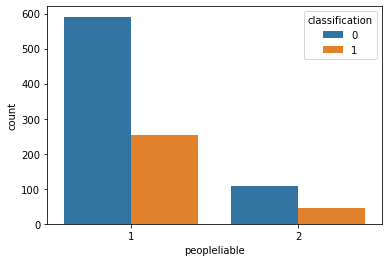

In [22]:
sns.countplot(x='peopleliable', data=germany,hue='classification')

## Box Plot

## Duration

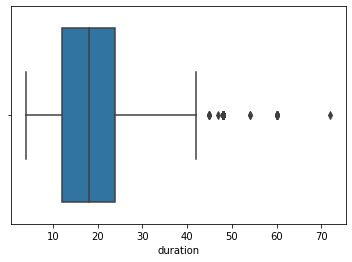

In [23]:
sns.boxplot(x=germany['duration'])

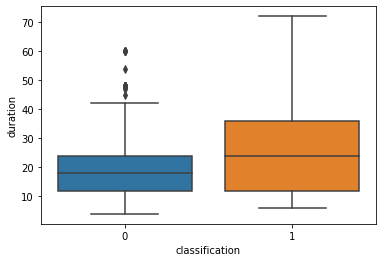

In [24]:
sns.boxplot(x='classification', y='duration', data=germany)

## Creditamount

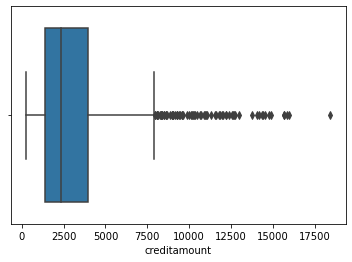

In [25]:
sns.boxplot(x=germany['creditamount'])

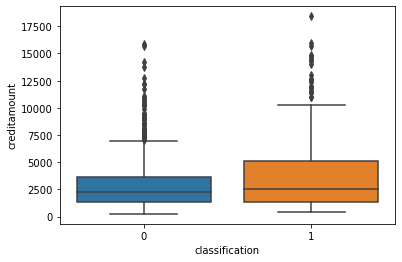

In [26]:
sns.boxplot(x='classification', y='creditamount', data=germany)

## Installmentrate

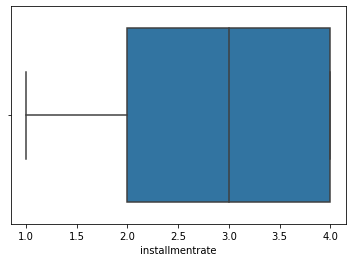

In [27]:
sns.boxplot(x=germany['installmentrate'])

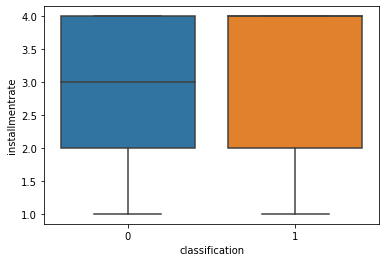

In [28]:
sns.boxplot(x='classification', y='installmentrate', data=germany)

## Pre_residencesince

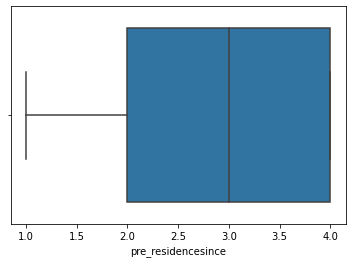

In [29]:
sns.boxplot(x=germany['pre_residencesince'])

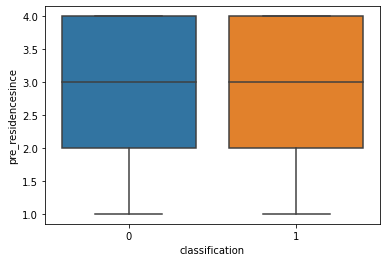

In [30]:
sns.boxplot(x='classification', y='pre_residencesince', data=germany)

## Age

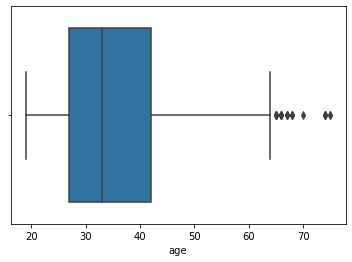

In [31]:
sns.boxplot(x=germany['age'])

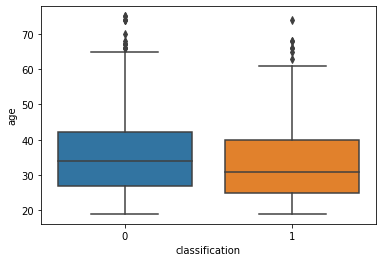

In [32]:
sns.boxplot(x='classification', y='age', data=germany)

## Existingcredits

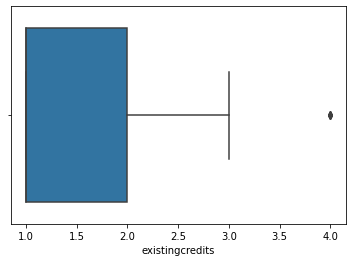

In [33]:
sns.boxplot(x=germany['existingcredits'])

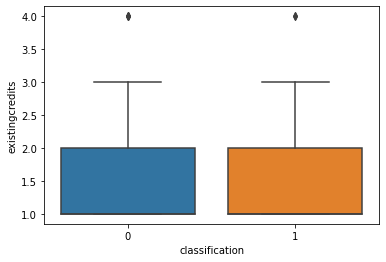

In [34]:
sns.boxplot(x='classification', y='existingcredits', data=germany)

# Data Transformation

## One Hot Encoding - Categorical Features

In [39]:
categorical_variables = names = ['existingchecking', 'credithistory', 'purpose',
         'savings','pre_employmentsince', 'status_sex', 'otherdebtors',
         'property', 'otherinstallmentplans', 'housing',
         'job', 'telephone', 'foreignworker']

In [40]:
d = defaultdict(LabelEncoder)

In [41]:
labelencode = germany[categorical_variables].apply(lambda x: d[x.name].fit_transform(x))

for x in range(len(categorical_variables)):
    print(categorical_variables[x], ": ", germany[categorical_variables[x]].unique())
    print(categorical_variables[x], ": ", labelencode[categorical_variables[x]].unique())

existingchecking :  ['A11' 'A12' 'A14' 'A13']
existingchecking :  [0 1 3 2]
credithistory :  ['A34' 'A32' 'A33' 'A30' 'A31']
credithistory :  [4 2 3 0 1]
purpose :  ['A43' 'A46' 'A42' 'A40' 'A41' 'A49' 'A44' 'A45' 'A410' 'A48']
purpose :  [4 7 3 0 1 9 5 6 2 8]
savings :  ['A65' 'A61' 'A63' 'A64' 'A62']
savings :  [4 0 2 3 1]
pre_employmentsince :  ['A75' 'A73' 'A74' 'A71' 'A72']
pre_employmentsince :  [4 2 3 0 1]
status_sex :  ['A93' 'A92' 'A91' 'A94']
status_sex :  [2 1 0 3]
otherdebtors :  ['A101' 'A103' 'A102']
otherdebtors :  [0 2 1]
property :  ['A121' 'A122' 'A124' 'A123']
property :  [0 1 3 2]
otherinstallmentplans :  ['A143' 'A141' 'A142']
otherinstallmentplans :  [2 0 1]
housing :  ['A152' 'A153' 'A151']
housing :  [1 2 0]
job :  ['A173' 'A172' 'A174' 'A171']
job :  [2 1 3 0]
telephone :  ['A192' 'A191']
telephone :  [1 0]
foreignworker :  ['A201' 'A202']
foreignworker :  [0 1]


## Create dummy for all the cateogircal variables 

In [42]:
dummycatevar = pd.get_dummies(germany[categorical_variables])

## Concatenate the transformed dataset

In [43]:
numerical_variables = ['duration', 'creditamount','installmentrate', 'pre_residencesince',
                       'age', 'existingcredits', 'peopleliable', 'classification']

In [44]:
transform_data_clean = pd.concat([germany[numerical_variables], dummycatevar], axis = 1)
print(transform_data_clean.shape)

(1000, 62)


In [16]:
transform_data_clean.head(5)

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,classification,existingchecking_A11,existingchecking_A12,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202
0,6,1169,4,4,67,2,1,0,1,0,...,1,0,0,0,1,0,0,1,1,0
1,48,5951,2,2,22,1,1,1,0,1,...,1,0,0,0,1,0,1,0,1,0
2,12,2096,2,3,49,1,2,0,0,0,...,1,0,0,1,0,0,1,0,1,0
3,42,7882,2,4,45,1,2,0,1,0,...,0,1,0,0,1,0,1,0,1,0
4,24,4870,3,4,53,2,2,1,1,0,...,0,1,0,0,1,0,1,0,1,0


- Original Dataset: 'transform_data_clean'

## Heatmap

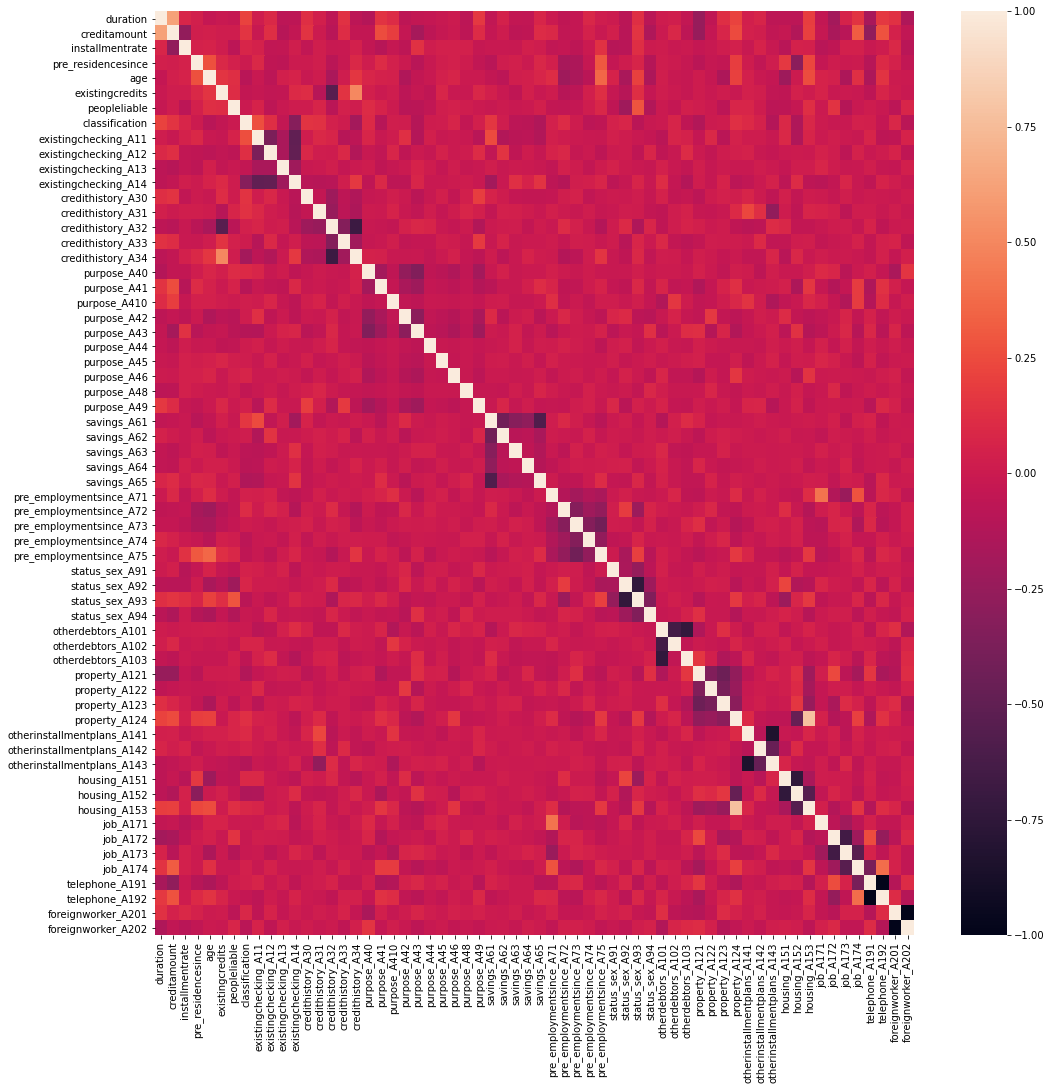

<Figure size 432x288 with 0 Axes>

In [46]:
fig, ax = plt.subplots(figsize=(17,17))   
corrMatrix = transform_data_clean.corr()
sns.heatmap(corrMatrix)
plt.show()
plt.savefig('heatmap.png')

<ipython-input-47-a9906d5d319e>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  transform_data_clean.hist(ax = ax)


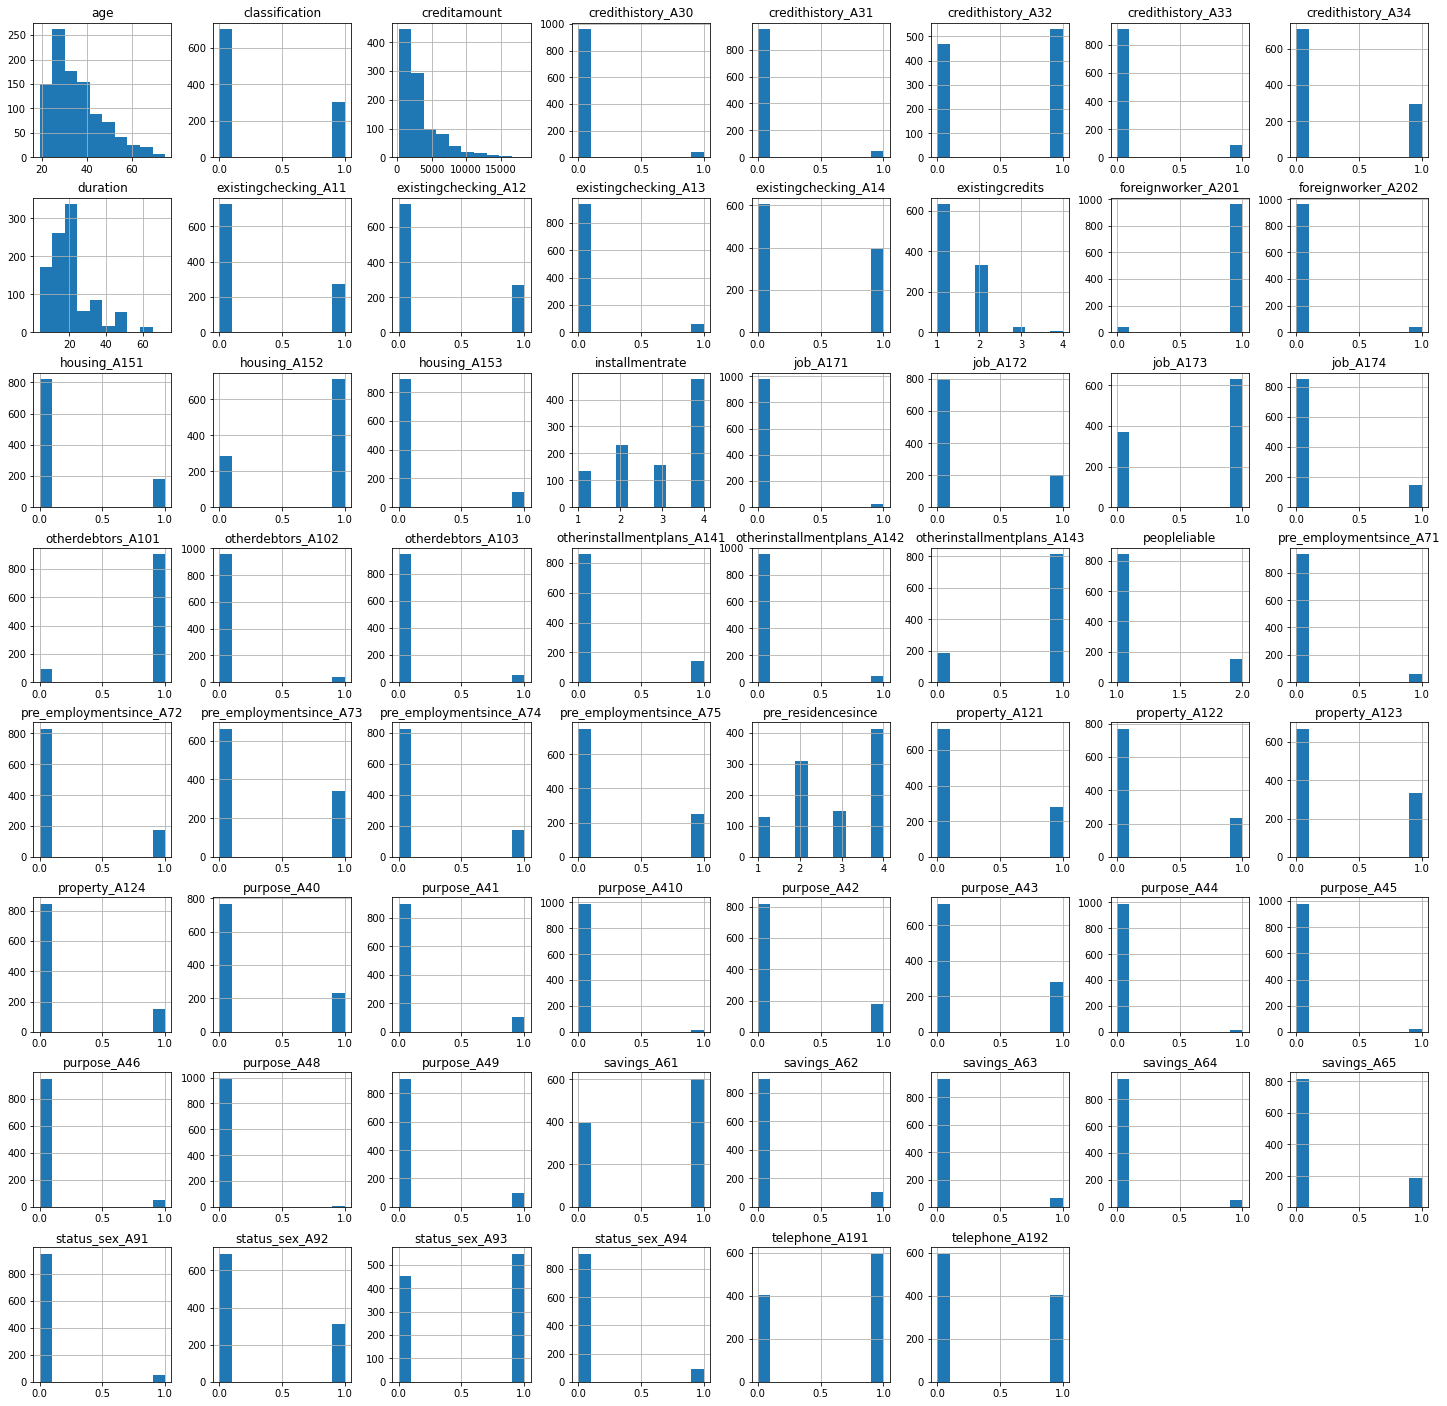

In [47]:
fig = plt.figure(figsize = (25,25))
ax = fig.gca()
transform_data_clean.hist(ax = ax)
plt.savefig('fig.png')

## Using MinMax Scaler for Normalization

In [51]:
min_max_scaler = MinMaxScaler()

germany_mm = pd.DataFrame(min_max_scaler.fit_transform(transform_data_clean[['duration', 'creditamount','installmentrate', 'pre_residencesince', 'age', 'existingcredits', 'peopleliable', 'classification']]))

In [53]:
germany_mm.columns = ['duration', 'creditamount','installmentrate', 'pre_residencesince',
                       'age', 'existingcredits', 'peopleliable', 'classification']

transform_data_clean_m = pd.concat([germany_mm,dummycatevar], axis = 1 )

In [137]:
transform_data_clean_m.describe()

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,classification,existingchecking_A11,existingchecking_A12,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.248574,0.166241,0.657667,0.615000,0.295464,0.135667,0.155000,0.300000,0.274000,0.269000,...,0.713000,0.108000,0.022000,0.2000,0.630000,0.148000,0.596000,0.404000,0.963000,0.037000
std,0.177336,0.155317,0.372905,0.367906,0.203133,0.192551,0.362086,0.458487,0.446232,0.443662,...,0.452588,0.310536,0.146757,0.4002,0.483046,0.355278,0.490943,0.490943,0.188856,0.188856
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.117647,0.061379,0.333333,0.333333,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.205882,0.113871,0.666667,0.666667,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.0000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,0.294118,0.204812,1.000000,1.000000,0.410714,0.333333,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.0000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Split training and test data - Train_Test_Split Approach

In [55]:
X_classification = transform_data_clean_m.drop('classification', axis = 1)
y_classification = transform_data_clean_m['classification']

X_train, X_test, y_train, y_test = train_test_split(X_classification,y_classification,test_size =0.2, random_state=10)

In [205]:
transform_data_clean_m.classification.value_counts()

0.0    700
1.0    300
Name: classification, dtype: int64

# Classification - Machine Learning Algorithm

## Logistic Regression (LR)

In [56]:
lr = LogisticRegression(class_weight=None, random_state=10, max_iter=1000)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

## Confusion Matrix

In [57]:
cfm = confusion_matrix(y_test, y_pred)
print (cfm)

[[120  18]
 [ 30  32]]


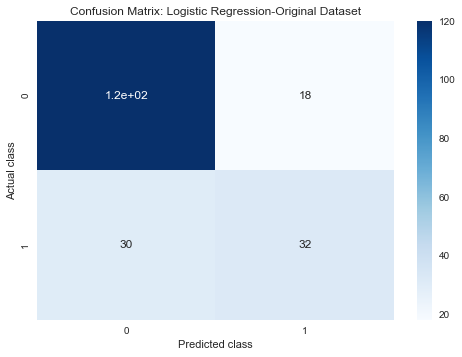

In [105]:
sns.heatmap(cfm, cmap="Blues", annot=True)
plt.title('Confusion Matrix: Logistic Regression-Original Dataset')
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.savefig('cfm_lr_or.png')

- Positive Class (Bad=1), Negative Class (Good=0)
- True Positive: 32, False negative (Type II): 30, False positive (Type I): 18, True Negative: 120

## LR prediction probability

In [68]:
accu1 = accuracy_score(y_test,y_pred)
print("accuracy_score : ",accu1)

accuracy_score :  0.76


## LR Classification Report

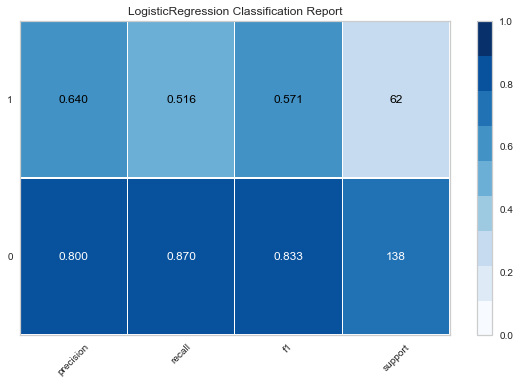

In [126]:
classes = [0,1]
visualizer1 = ClassificationReport(lr, classes=classes, support=True,cmap='Blues')
visualizer1.fit(X_train, y_train)
visualizer1.score(X_test, y_test)
visualizer1.show()

## SVM (linear kernel function)

In [111]:
svm_clf = SVC(kernel='linear', probability=True)

In [112]:
svm_clf.fit(X_train,y_train)
y_pred_2 = svm_clf.predict(X_test)

## Confusion Matrix

In [113]:
cfm_2 = confusion_matrix(y_test, y_pred_2)
print (cfm_2)

[[121  17]
 [ 30  32]]


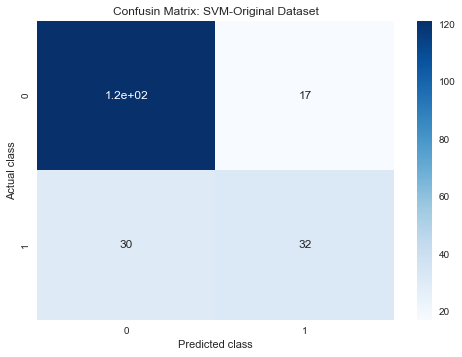

In [114]:
sns.heatmap(cfm_2, cmap="Blues", annot=True)
plt.title('Confusin Matrix: SVM-Original Dataset')
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.savefig('cfm_svm_or.png')

- True Positive: 24, False negative (Type II): 35, False positive (Type I): 25, True Negative: 116

## SVM prediction probability

In [118]:
accu2 = accuracy_score(y_test,y_pred_2)
print("accuracy_score : ",accu2)

accuracy_score :  0.765


- Accuracy Score: 70%
- 0.5% lower than the benchmark

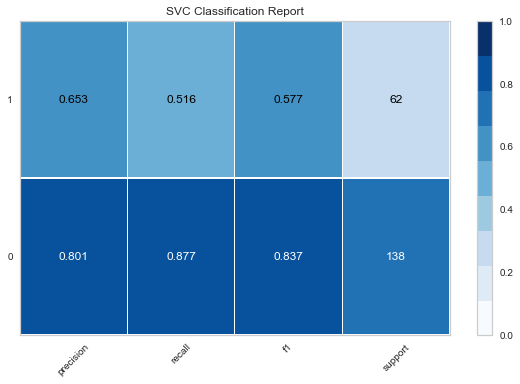

In [125]:
classes = [0,1]
visualizer2 = ClassificationReport(svm_clf, classes=classes, support=True,cmap='Blues')
visualizer2.fit(X_train, y_train)
visualizer2.score(X_test, y_test)
visualizer2.show()

## Bootstrap - Making New Dataset

### Bootstrap 100 iterations

In [325]:
transform_data_clean.to_csv(r'C:\Users\Drago\Desktop\original.csv', index = False, header=True)

In [340]:
values = transform_data_clean.values
n_iterations = 100
n_size = int(len(transform_data_clean))
stats = list()
for i in range(n_iterations):
    bs100 = resample(values, replace=True, n_samples=n_size)
    bs100_df = pd.DataFrame(bs1000, columns=['duration', 'creditamount', 'installmentrate', 'pre_residencesince',
       'age', 'existingcredits', 'peopleliable', 'existingchecking_A11',
       'existingchecking_A12', 'existingchecking_A13', 'existingchecking_A14',
       'credithistory_A30', 'credithistory_A31', 'credithistory_A32',
       'credithistory_A33', 'credithistory_A34', 'purpose_A40', 'purpose_A41',
       'purpose_A410', 'purpose_A42', 'purpose_A43', 'purpose_A44',
       'purpose_A45', 'purpose_A46', 'purpose_A48', 'purpose_A49',
       'savings_A61', 'savings_A62', 'savings_A63', 'savings_A64',
       'savings_A65', 'pre_employmentsince_A71', 'pre_employmentsince_A72',
       'pre_employmentsince_A73', 'pre_employmentsince_A74',
       'pre_employmentsince_A75', 'status_sex_A91', 'status_sex_A92',
       'status_sex_A93', 'status_sex_A94', 'otherdebtors_A101',
       'otherdebtors_A102', 'otherdebtors_A103', 'property_A121',
       'property_A122', 'property_A123', 'property_A124',
       'otherinstallmentplans_A141', 'otherinstallmentplans_A142',
       'otherinstallmentplans_A143', 'housing_A151', 'housing_A152',
       'housing_A153', 'job_A171', 'job_A172', 'job_A173', 'job_A174',
       'telephone_A191', 'telephone_A192', 'foreignworker_A201',
       'foreignworker_A202', 'classification'])

In [341]:
transform_data_clean.head(10)

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,classification,existingchecking_A11,existingchecking_A12,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202
0,6,1169,4,4,67,2,1,0,1,0,...,1,0,0,0,1,0,0,1,1,0
1,48,5951,2,2,22,1,1,1,0,1,...,1,0,0,0,1,0,1,0,1,0
2,12,2096,2,3,49,1,2,0,0,0,...,1,0,0,1,0,0,1,0,1,0
3,42,7882,2,4,45,1,2,0,1,0,...,0,1,0,0,1,0,1,0,1,0
4,24,4870,3,4,53,2,2,1,1,0,...,0,1,0,0,1,0,1,0,1,0
5,36,9055,2,4,35,1,2,0,0,0,...,0,1,0,1,0,0,0,1,1,0
6,24,2835,3,4,53,1,1,0,0,0,...,1,0,0,0,1,0,1,0,1,0
7,36,6948,2,2,35,1,1,0,0,1,...,0,0,0,0,0,1,0,1,1,0
8,12,3059,2,4,61,1,1,0,0,0,...,1,0,0,1,0,0,1,0,1,0
9,30,5234,4,2,28,2,1,1,0,1,...,1,0,0,0,0,1,1,0,1,0


In [342]:
bs100_df.head(10)

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,existingchecking_A11,existingchecking_A12,existingchecking_A13,...,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202,classification
0,11,3905,2,2,36,2,2,0,1,0,...,0,0,0,0,1,0,1,0,1,0
1,15,1271,3,4,39,2,1,1,0,0,...,0,1,0,0,1,0,0,1,1,0
2,15,3594,1,2,46,2,1,0,0,0,...,1,0,0,1,0,0,1,0,1,0
3,36,7980,4,4,27,2,1,1,0,0,...,0,0,0,0,1,0,0,1,1,0
4,48,15672,2,2,23,1,1,1,0,1,...,1,0,0,0,1,0,0,1,1,0
5,30,4272,2,2,26,2,1,0,0,0,...,1,0,0,1,0,0,1,0,1,0
6,9,1288,3,4,48,2,2,0,1,0,...,1,0,0,0,1,0,1,0,0,1
7,48,3609,1,1,27,1,1,0,0,0,...,1,0,0,0,1,0,1,0,1,0
8,18,4297,4,3,40,1,1,1,0,1,...,1,0,0,0,0,1,0,1,1,0
9,30,7596,1,4,63,2,1,0,0,0,...,1,0,0,0,1,0,1,0,1,0


In [343]:
bs100_mm = pd.DataFrame(min_max_scaler.fit_transform(bs100_df[['duration', 'creditamount','installmentrate', 'pre_residencesince', 'age', 'existingcredits', 'peopleliable', 
                                                               'classification']]))
bs100_mm.columns = ['duration', 'creditamount','installmentrate', 'pre_residencesince',
                       'age', 'existingcredits', 'peopleliable', 'classification']

In [344]:
bs100_mm.head(10)

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,classification
0,0.102941,0.199967,0.333333,0.333333,0.303571,0.333333,1.0,0.0
1,0.161765,0.054827,0.666667,1.000000,0.357143,0.333333,0.0,0.0
2,0.161765,0.182830,0.000000,0.333333,0.482143,0.333333,0.0,0.0
3,0.470588,0.424510,1.000000,1.000000,0.142857,0.333333,0.0,0.0
4,0.647059,0.848358,0.333333,0.333333,0.071429,0.000000,0.0,0.0
5,0.382353,0.220190,0.333333,0.333333,0.125000,0.333333,0.0,0.0
6,0.073529,0.055764,0.666667,1.000000,0.517857,0.333333,1.0,1.0
7,0.647059,0.183657,0.000000,0.000000,0.142857,0.000000,0.0,0.0
8,0.205882,0.221567,1.000000,0.666667,0.375000,0.000000,0.0,0.0
9,0.382353,0.403350,0.000000,1.000000,0.785714,0.333333,0.0,0.0


In [345]:
bs100_df.drop(['duration', 'creditamount','installmentrate', 'pre_residencesince',
                       'age', 'existingcredits', 'peopleliable','classification'], axis=1, inplace=True)

In [346]:
bs100_df.head(10)

,existingchecking_A11,existingchecking_A12,existingchecking_A13,existingchecking_A14,credithistory_A30,credithistory_A31,credithistory_A32,credithistory_A33,credithistory_A34,purpose_A40,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202
0,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,1,0,1
1,1,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,1,1
2,0,0,0,0,1,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,1
3,1,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,0,1,1
4,1,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,1
5,0,0,0,0,1,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,1
6,0,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,1,0,0
7,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,1,0,1,0,1
8,1,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,1,1
9,0,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,1,0,1,0,1


In [347]:
tbs100 = pd.concat([bs100_mm,bs100_df],axis=1)

In [348]:
tbs100.describe()

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,classification,existingchecking_A11,existingchecking_A12,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.244691,0.165020,0.672667,0.621667,0.294107,0.144000,0.170000,0.033000,0.282000,0.26400,...,0.188000,0.68300,0.129000,0.019000,0.197000,0.639000,0.145000,0.588000,0.412000,0.967000
std,0.178172,0.154089,0.375195,0.368782,0.208389,0.200482,0.375821,0.178726,0.450198,0.44102,...,0.390908,0.46554,0.335368,0.136593,0.397931,0.480531,0.352277,0.492441,0.492441,0.178726
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.117647,0.058712,0.333333,0.333333,0.125000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.205882,0.112712,1.000000,0.666667,0.250000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,1.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,0.294118,0.203673,1.000000,1.000000,0.410714,0.333333,0.000000,0.000000,1.000000,1.00000,...,0.000000,1.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [357]:
tbs100.classification.value_counts()

0.0    967
1.0     33
Name: classification, dtype: int64

In [431]:
tbs100.to_csv(r'C:\Users\Drago\Desktop\bs100.csv', index = False, header=True)

In [778]:
X1 = tbs100.drop('classification', axis = 1)
y1 = tbs100['classification']

In [779]:
bs100lr = LogisticRegression(class_weight=None, random_state=10, max_iter=1000)
bs100lr.fit(X1,y1)
bs100_pred = bs100lr.predict(X_test)

## LR prediction probability

In [780]:
accu3 = accuracy_score(y_test, bs100_pred)
print("accuracy_score : ",accu3)

accuracy_score :  0.44


## Confusion Matrix

In [781]:
cfm_3 = confusion_matrix(y_test, bs100_pred)
print(cfm_3)

[[44 94]
 [18 44]]


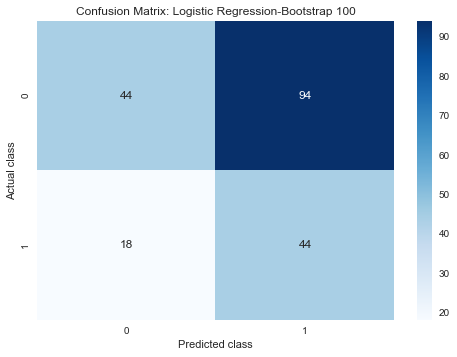

In [782]:
sns.heatmap(cfm_3, cmap="Blues", annot=True)
plt.title('Confusion Matrix: Logistic Regression-Bootstrap 100')
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.savefig('cfm_lr_bs100.png')

## LR Classification Report

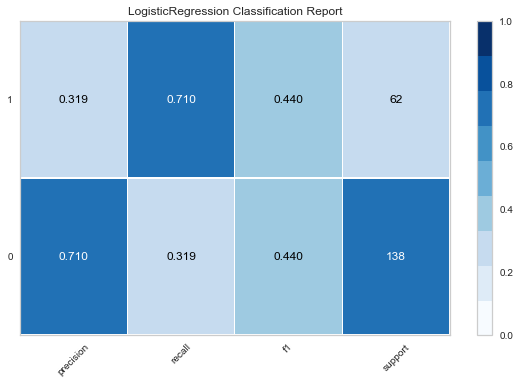

In [783]:
visualizer3 = ClassificationReport(bs100lr, classes=classes, support=True,cmap='Blues')
visualizer3.fit(X1, y1)
visualizer3.score(X_test, y_test)
visualizer3.show()

## SVM (linear kernel function)

In [421]:
svm_clf_2 = SVC(kernel='linear', probability=True)

In [786]:
svm_clf_2.fit(X1,y1)
bs100_pred2 = svm_clf_2.predict(X_test)

## SVM prediction probability

In [787]:
accu4 = accuracy_score(y_test, bs100_pred2)
print("accuracy_score : ",accu4)

accuracy_score :  0.345


## Confusion Matrix

In [788]:
cfm_4 = confusion_matrix(y_test, bs100_pred2)
print (cfm_4)

[[  7 131]
 [  0  62]]


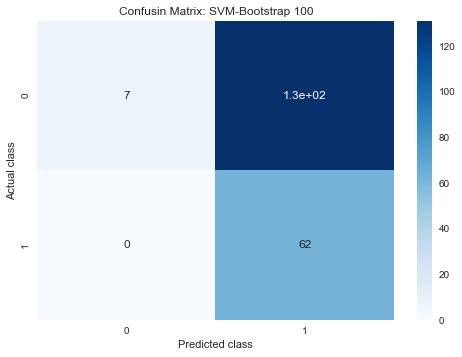

In [789]:
sns.heatmap(cfm_4, cmap="Blues", annot=True)
plt.title('Confusin Matrix: SVM-Bootstrap 100')
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.savefig('cfm_svm_bs100.png')

## SVM Classification Report

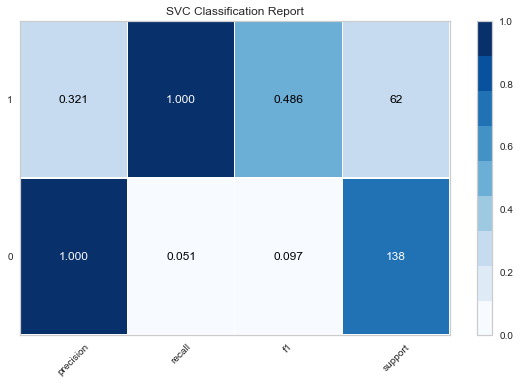

In [791]:
visualizer4 = ClassificationReport(svm_clf_2, classes=classes, support=True,cmap='Blues')
visualizer4.fit(X1, y1)
visualizer4.score(X_test, y_test)
visualizer4.show()

## Bootstrap 1000 iterations

In [382]:
values2 = transform_data_clean.values
n_iterations = 1000
n_size = int(len(transform_data_clean))
stats = list()
for i in range(n_iterations):
    bs1000 = resample(values2, replace=True, n_samples=n_size)
    bs1000_df = pd.DataFrame(bs1000, columns=['duration', 'creditamount', 'installmentrate', 'pre_residencesince',
       'age', 'existingcredits', 'peopleliable', 'existingchecking_A11',
       'existingchecking_A12', 'existingchecking_A13', 'existingchecking_A14',
       'credithistory_A30', 'credithistory_A31', 'credithistory_A32',
       'credithistory_A33', 'credithistory_A34', 'purpose_A40', 'purpose_A41',
       'purpose_A410', 'purpose_A42', 'purpose_A43', 'purpose_A44',
       'purpose_A45', 'purpose_A46', 'purpose_A48', 'purpose_A49',
       'savings_A61', 'savings_A62', 'savings_A63', 'savings_A64',
       'savings_A65', 'pre_employmentsince_A71', 'pre_employmentsince_A72',
       'pre_employmentsince_A73', 'pre_employmentsince_A74',
       'pre_employmentsince_A75', 'status_sex_A91', 'status_sex_A92',
       'status_sex_A93', 'status_sex_A94', 'otherdebtors_A101',
       'otherdebtors_A102', 'otherdebtors_A103', 'property_A121',
       'property_A122', 'property_A123', 'property_A124',
       'otherinstallmentplans_A141', 'otherinstallmentplans_A142',
       'otherinstallmentplans_A143', 'housing_A151', 'housing_A152',
       'housing_A153', 'job_A171', 'job_A172', 'job_A173', 'job_A174',
       'telephone_A191', 'telephone_A192', 'foreignworker_A201',
       'foreignworker_A202', 'classification'])

In [383]:
bs1000_mm = pd.DataFrame(min_max_scaler.fit_transform(bs1000_df[['duration', 'creditamount','installmentrate', 'pre_residencesince', 'age', 'existingcredits', 'peopleliable', 'classification']]))
bs1000_mm.columns = ['duration', 'creditamount','installmentrate', 'pre_residencesince',
                       'age', 'existingcredits', 'peopleliable', 'classification']

In [386]:
bs1000_df.drop(['duration', 'creditamount','installmentrate', 'pre_residencesince',
                       'age', 'existingcredits', 'peopleliable','classification'], axis=1, inplace=True)

In [387]:
tbs1000 = pd.concat([bs1000_mm,bs1000_df],axis=1)

In [388]:
tbs1000.describe()

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,classification,existingchecking_A11,existingchecking_A12,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.305089,0.192708,0.665000,0.608000,0.290268,0.137000,0.156000,0.040000,0.300000,0.278000,...,0.169000,0.74400,0.087000,0.016000,0.213000,0.617000,0.154000,0.588000,0.412000,0.960000
std,0.216474,0.184052,0.372712,0.368216,0.202409,0.191604,0.363037,0.196057,0.458487,0.448238,...,0.374939,0.43664,0.281976,0.125538,0.409633,0.486362,0.361129,0.492441,0.492441,0.196057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142857,0.067840,0.333333,0.333333,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.250000,0.127302,0.666667,0.666667,0.232143,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,0.357143,0.238770,1.000000,1.000000,0.375000,0.333333,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [389]:
tbs1000.classification.value_counts()

0.0    960
1.0     40
Name: classification, dtype: int64

In [459]:
tbs1000.to_csv(r'C:\Users\Drago\Desktop\bs1000.csv', index = False, header=True)

In [792]:
X2 = tbs1000.drop('classification', axis = 1)
y2 = tbs1000['classification']

In [793]:
bs1000lr = LogisticRegression(class_weight=None, random_state=10, max_iter=1000)
bs1000lr.fit(X2,y2)
bs1000_pred = bs1000lr.predict(X_test)

## LR prediction probability

In [794]:
accu5 = accuracy_score(y_test, bs1000_pred)
print("accuracy_score : ",accu5)

accuracy_score :  0.56


## Confusion Matrix

In [795]:
cfm_5 = confusion_matrix(y_test, bs1000_pred)
print (cfm_5)

[[105  33]
 [ 55   7]]


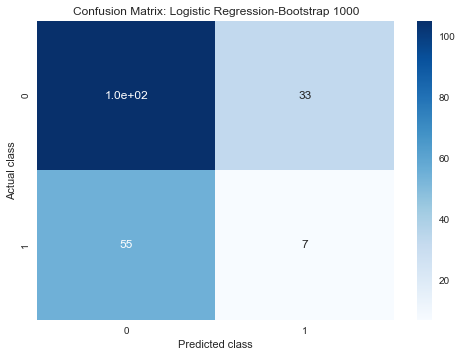

In [796]:
sns.heatmap(cfm_5, cmap="Blues", annot=True)
plt.title('Confusion Matrix: Logistic Regression-Bootstrap 1000')
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.savefig('cfm_lr_bs1000.png')

## LR Classification Report

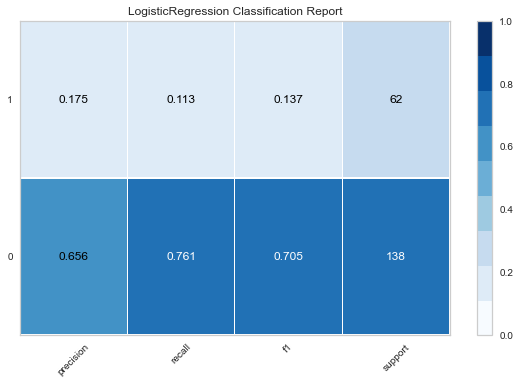

In [797]:
visualizer5 = ClassificationReport(bs1000lr, classes=classes, support=True,cmap='Blues')
visualizer5.fit(X2, y2)
visualizer5.score(X_test, y_test)
visualizer5.show()

## SVM (linear kernel function)

In [798]:
svm_clf_3 = SVC(kernel='linear', probability=True)

In [800]:
svm_clf_3.fit(X2,y2)
bs1000_pred2 = svm_clf_3.predict(X_test)

## SVM prediction probability

In [801]:
accu6 = accuracy_score(y_test, bs1000_pred2)
print("accuracy_score : ",accu6)

accuracy_score :  0.345


## Confusion Matrix

In [802]:
cfm_6 = confusion_matrix(y_test, bs1000_pred2)
print (cfm_6)

[[  7 131]
 [  0  62]]


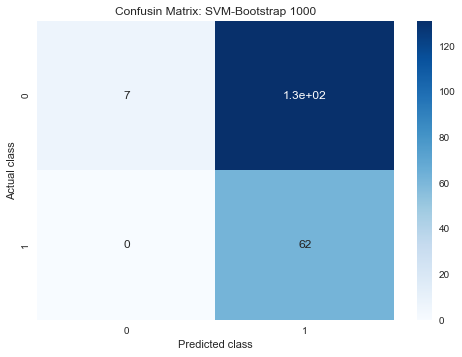

In [803]:
sns.heatmap(cfm_6, cmap="Blues", annot=True)
plt.title('Confusin Matrix: SVM-Bootstrap 1000')
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.savefig('cfm_svm_bs1000.png')

## SVM Classification Report

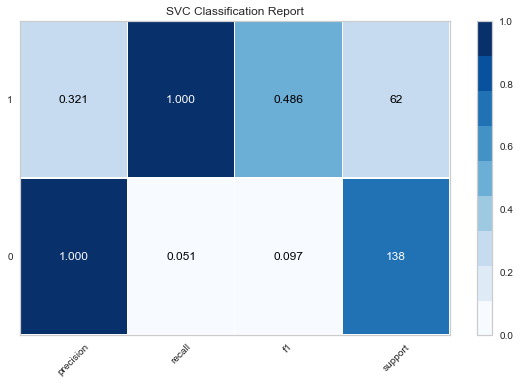

In [804]:
visualizer6 = ClassificationReport(svm_clf_3, classes=classes, support=True,cmap='Blues')
visualizer6.fit(X2, y2)
visualizer6.score(X_test, y_test)
visualizer6.show()

## Bootstrap 5000 iterations

In [433]:
values3 = transform_data_clean.values
n_iterations = 5000
n_size = int(len(transform_data_clean))
stats = list()
for i in range(n_iterations):
    bs5000 = resample(values3, replace=True, n_samples=n_size)
    bs5000_df = pd.DataFrame(bs5000, columns=['duration', 'creditamount', 'installmentrate', 'pre_residencesince',
       'age', 'existingcredits', 'peopleliable', 'existingchecking_A11',
       'existingchecking_A12', 'existingchecking_A13', 'existingchecking_A14',
       'credithistory_A30', 'credithistory_A31', 'credithistory_A32',
       'credithistory_A33', 'credithistory_A34', 'purpose_A40', 'purpose_A41',
       'purpose_A410', 'purpose_A42', 'purpose_A43', 'purpose_A44',
       'purpose_A45', 'purpose_A46', 'purpose_A48', 'purpose_A49',
       'savings_A61', 'savings_A62', 'savings_A63', 'savings_A64',
       'savings_A65', 'pre_employmentsince_A71', 'pre_employmentsince_A72',
       'pre_employmentsince_A73', 'pre_employmentsince_A74',
       'pre_employmentsince_A75', 'status_sex_A91', 'status_sex_A92',
       'status_sex_A93', 'status_sex_A94', 'otherdebtors_A101',
       'otherdebtors_A102', 'otherdebtors_A103', 'property_A121',
       'property_A122', 'property_A123', 'property_A124',
       'otherinstallmentplans_A141', 'otherinstallmentplans_A142',
       'otherinstallmentplans_A143', 'housing_A151', 'housing_A152',
       'housing_A153', 'job_A171', 'job_A172', 'job_A173', 'job_A174',
       'telephone_A191', 'telephone_A192', 'foreignworker_A201',
       'foreignworker_A202', 'classification'])

In [434]:
bs5000_mm = pd.DataFrame(min_max_scaler.fit_transform(bs5000_df[['duration', 'creditamount','installmentrate', 'pre_residencesince', 'age', 'existingcredits', 'peopleliable', 'classification']]))
bs5000_mm.columns = ['duration', 'creditamount','installmentrate', 'pre_residencesince',
                       'age', 'existingcredits', 'peopleliable', 'classification']

In [435]:
bs5000_df.drop(['duration', 'creditamount','installmentrate', 'pre_residencesince',
                       'age', 'existingcredits', 'peopleliable','classification'], axis=1, inplace=True)

In [436]:
tbs5000 = pd.concat([bs5000_mm,bs5000_df],axis=1)

In [437]:
tbs5000.describe()

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,classification,existingchecking_A11,existingchecking_A12,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.295250,0.165483,0.663333,0.630667,0.296536,0.138667,0.135000,0.024000,0.310000,0.252000,...,0.189000,0.699000,0.112000,0.025000,0.18300,0.632000,0.160000,0.608000,0.392000,0.976000
std,0.207859,0.166826,0.375228,0.359243,0.203674,0.191855,0.341895,0.153126,0.462725,0.434379,...,0.391705,0.458922,0.315524,0.156203,0.38686,0.482503,0.366789,0.488441,0.488441,0.153126
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142857,0.057775,0.333333,0.333333,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.250000,0.108562,0.666667,0.666667,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,0.357143,0.204179,1.000000,1.000000,0.410714,0.333333,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [807]:
tbs5000.classification.value_counts()

0.0    976
1.0     24
Name: classification, dtype: int64

In [458]:
tbs5000.to_csv(r'C:\Users\Drago\Desktop\bs5000.csv', index = False, header=True)

In [808]:
X3 = tbs5000.drop('classification', axis = 1)
y3 = tbs5000['classification']

In [809]:
bs5000lr = LogisticRegression(class_weight=None, random_state=10, max_iter=1000)
bs5000lr.fit(X3,y3)
bs5000_pred = bs5000lr.predict(X_test)

## LR prediction probability

In [810]:
accu7 = accuracy_score(y_test, bs5000_pred)
print("accuracy_score : ",accu7)

accuracy_score :  0.495


## Confusion Matrix

In [811]:
cfm_7 = confusion_matrix(y_test, bs5000_pred)
print (cfm_7)

[[90 48]
 [53  9]]


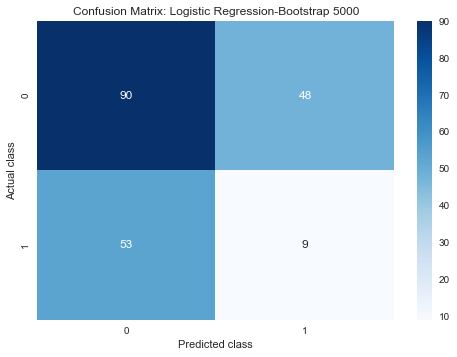

In [812]:
sns.heatmap(cfm_7, cmap="Blues", annot=True)
plt.title('Confusion Matrix: Logistic Regression-Bootstrap 5000')
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.savefig('cfm_lr_bs5000.png')

## LR Classification Report

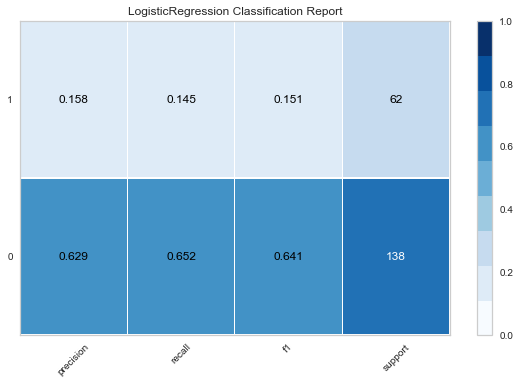

In [813]:
visualizer7 = ClassificationReport(bs5000lr, classes=classes, support=True,cmap='Blues')
visualizer7.fit(X3, y3)
visualizer7.score(X_test, y_test)
visualizer7.show()

## SVM (linear kernel function)

In [814]:
svm_clf_4 = SVC(kernel='linear', probability=True)

In [815]:
svm_clf_4.fit(X3,y3)
bs5000_pred2 = svm_clf_4.predict(X_test)

## SVM prediction probability

In [816]:
accu8 = accuracy_score(y_test, bs5000_pred2)
print("accuracy_score : ",accu8)

accuracy_score :  0.345


## Confusion Matrix

In [817]:
cfm_8 = confusion_matrix(y_test, bs5000_pred2)
print (cfm_8)

[[  7 131]
 [  0  62]]


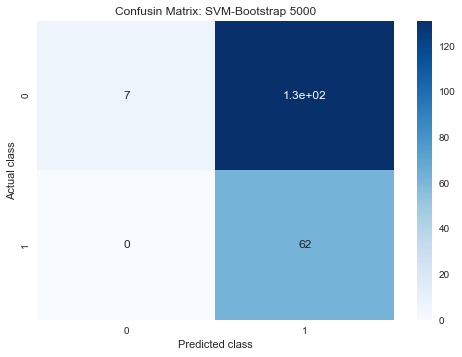

In [818]:
sns.heatmap(cfm_8, cmap="Blues", annot=True)
plt.title('Confusin Matrix: SVM-Bootstrap 5000')
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.savefig('cfm_svm_bs5000.png')

## SVM Classification Report

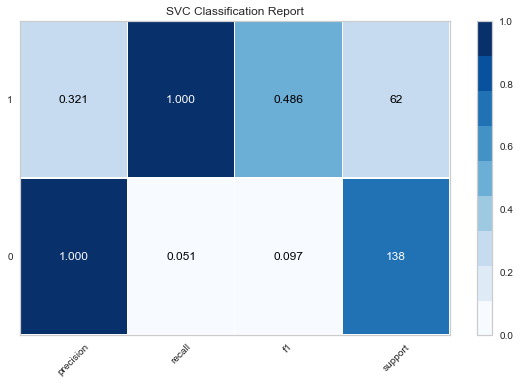

In [819]:
visualizer8 = ClassificationReport(svm_clf_4, classes=classes, support=True,cmap='Blues')
visualizer8.fit(X3, y3)
visualizer8.score(X_test, y_test)
visualizer8.show()

## Bootstrap 10,000 iterations

In [452]:
values4 = transform_data_clean.values
n_iterations = 10000
n_size = int(len(transform_data_clean))
stats = list()
for i in range(n_iterations):
    bs10000 = resample(values4, replace=True, n_samples=n_size)
    bs10000_df = pd.DataFrame(bs10000, columns=['duration', 'creditamount', 'installmentrate', 'pre_residencesince',
       'age', 'existingcredits', 'peopleliable', 'existingchecking_A11',
       'existingchecking_A12', 'existingchecking_A13', 'existingchecking_A14',
       'credithistory_A30', 'credithistory_A31', 'credithistory_A32',
       'credithistory_A33', 'credithistory_A34', 'purpose_A40', 'purpose_A41',
       'purpose_A410', 'purpose_A42', 'purpose_A43', 'purpose_A44',
       'purpose_A45', 'purpose_A46', 'purpose_A48', 'purpose_A49',
       'savings_A61', 'savings_A62', 'savings_A63', 'savings_A64',
       'savings_A65', 'pre_employmentsince_A71', 'pre_employmentsince_A72',
       'pre_employmentsince_A73', 'pre_employmentsince_A74',
       'pre_employmentsince_A75', 'status_sex_A91', 'status_sex_A92',
       'status_sex_A93', 'status_sex_A94', 'otherdebtors_A101',
       'otherdebtors_A102', 'otherdebtors_A103', 'property_A121',
       'property_A122', 'property_A123', 'property_A124',
       'otherinstallmentplans_A141', 'otherinstallmentplans_A142',
       'otherinstallmentplans_A143', 'housing_A151', 'housing_A152',
       'housing_A153', 'job_A171', 'job_A172', 'job_A173', 'job_A174',
       'telephone_A191', 'telephone_A192', 'foreignworker_A201',
       'foreignworker_A202', 'classification'])

In [453]:
bs10000_mm = pd.DataFrame(min_max_scaler.fit_transform(bs10000_df[['duration', 'creditamount','installmentrate', 'pre_residencesince', 'age', 'existingcredits', 'peopleliable', 'classification']]))
bs10000_mm.columns = ['duration', 'creditamount','installmentrate', 'pre_residencesince',
                       'age', 'existingcredits', 'peopleliable', 'classification']

In [454]:
bs10000_df.drop(['duration', 'creditamount','installmentrate', 'pre_residencesince',
                       'age', 'existingcredits', 'peopleliable','classification'], axis=1, inplace=True)

In [455]:
tbs10000 = pd.concat([bs10000_mm,bs10000_df],axis=1)

In [456]:
tbs10000.describe()

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,classification,existingchecking_A11,existingchecking_A12,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000
mean,0.308214,0.159413,0.679667,0.632000,0.290768,0.149667,0.152000,0.025000,0.319000,0.266000,...,0.173000,0.717000,0.110000,0.019000,0.2000,0.639000,0.142000,0.58400,0.41600,0.975000
std,0.215550,0.147305,0.367377,0.366423,0.197913,0.186700,0.359201,0.156203,0.466322,0.442085,...,0.378437,0.450682,0.313046,0.136593,0.4002,0.480531,0.349225,0.49314,0.49314,0.156203
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.00000,0.00000,0.000000
25%,0.142857,0.060503,0.333333,0.333333,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.00000,0.00000,1.000000
50%,0.250000,0.107395,1.000000,0.666667,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.0000,1.000000,0.000000,1.00000,0.00000,1.000000
75%,0.357143,0.203659,1.000000,1.000000,0.375000,0.333333,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.0000,1.000000,0.000000,1.00000,1.00000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.00000,1.00000,1.000000


In [457]:
tbs10000.classification.value_counts()

0.0    975
1.0     25
Name: classification, dtype: int64

In [439]:
tbs10000.to_csv(r'C:\Users\Drago\Desktop\bs10000.csv', index = False, header=True)

In [820]:
X4 = tbs10000.drop('classification', axis = 1)
y4 = tbs10000['classification']

In [822]:
bs10000lr = LogisticRegression(class_weight=None, random_state=10, max_iter=1000)
bs10000lr.fit(X4,y4)
bs10000_pred = bs10000lr.predict(X_test)

## LR prediction probability

In [823]:
accu9 = accuracy_score(y_test, bs10000_pred)
print("accuracy_score : ",accu9)

accuracy_score :  0.49


## Confusion Matrix

In [824]:
cfm_9 = confusion_matrix(y_test, bs10000_pred)
print (cfm_9)

[[93 45]
 [57  5]]


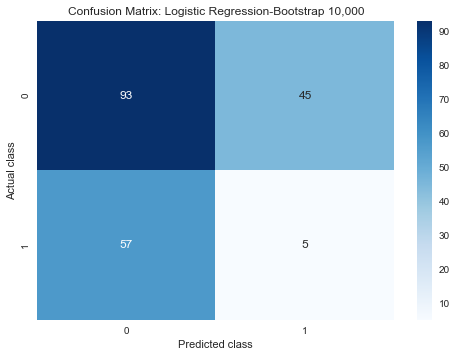

In [825]:
sns.heatmap(cfm_9, cmap="Blues", annot=True)
plt.title('Confusion Matrix: Logistic Regression-Bootstrap 10,000')
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.savefig('cfm_lr_bs10000.png')

## LR Classification Report

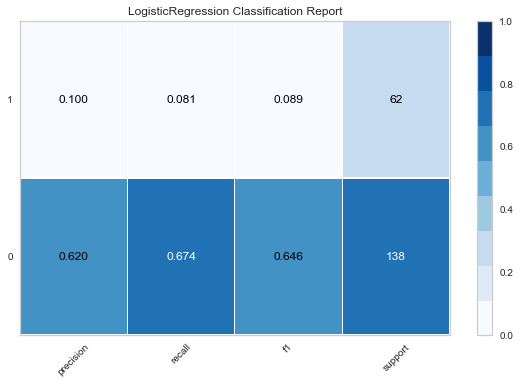

In [826]:
visualizer9 = ClassificationReport(bs10000lr, classes=classes, support=True,cmap='Blues')
visualizer9.fit(X4, y4)
visualizer9.score(X_test, y_test)
visualizer9.show()

## SVM (linear kernel function)

In [827]:
svm_clf_5 = SVC(kernel='linear', probability=True)

In [828]:
svm_clf_5.fit(X4,y4)
bs10000_pred2 = svm_clf_5.predict(X_test)

## SVM prediction probability

In [829]:
accu10 = accuracy_score(y_test, bs10000_pred2)
print("accuracy_score : ",accu10)

accuracy_score :  0.345


## Confusion Matrix

In [830]:
cfm_10 = confusion_matrix(y_test, bs10000_pred2)
print (cfm_10)

[[  7 131]
 [  0  62]]


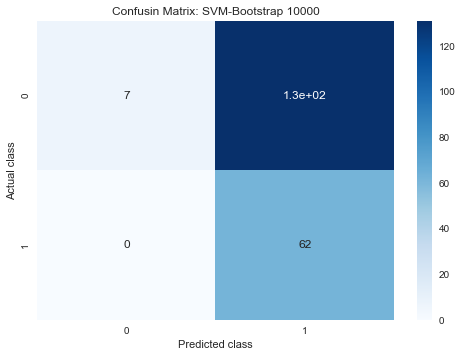

In [831]:
sns.heatmap(cfm_10, cmap="Blues", annot=True)
plt.title('Confusin Matrix: SVM-Bootstrap 10000')
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.savefig('cfm_svm_bs10000.png')

## SVM Classification Report

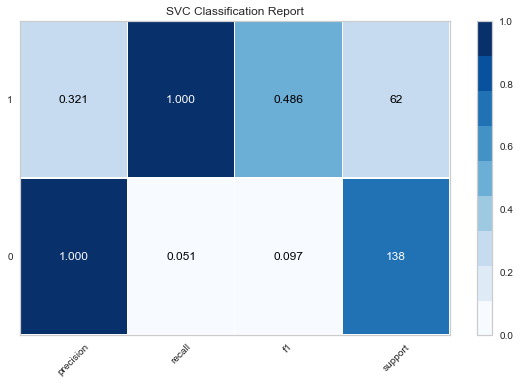

In [832]:
visualizer10 = ClassificationReport(svm_clf_5, classes=classes, support=True,cmap='Blues')
visualizer10.fit(X4, y4)
visualizer10.score(X_test, y_test)
visualizer10.show()

## Bootstrap 10,000 iterations - 50%

In [472]:
values5 = transform_data_clean.values
n_iterations = 10000
n_size = int(len(transform_data_clean) * 0.50)
stats = list()
for i in range(n_iterations):
    bs10000_05 = resample(values5, replace=True, n_samples=n_size)
    bs10000_05_df = pd.DataFrame(bs10000_05, columns=['duration', 'creditamount', 'installmentrate', 'pre_residencesince',
       'age', 'existingcredits', 'peopleliable', 'existingchecking_A11',
       'existingchecking_A12', 'existingchecking_A13', 'existingchecking_A14',
       'credithistory_A30', 'credithistory_A31', 'credithistory_A32',
       'credithistory_A33', 'credithistory_A34', 'purpose_A40', 'purpose_A41',
       'purpose_A410', 'purpose_A42', 'purpose_A43', 'purpose_A44',
       'purpose_A45', 'purpose_A46', 'purpose_A48', 'purpose_A49',
       'savings_A61', 'savings_A62', 'savings_A63', 'savings_A64',
       'savings_A65', 'pre_employmentsince_A71', 'pre_employmentsince_A72',
       'pre_employmentsince_A73', 'pre_employmentsince_A74',
       'pre_employmentsince_A75', 'status_sex_A91', 'status_sex_A92',
       'status_sex_A93', 'status_sex_A94', 'otherdebtors_A101',
       'otherdebtors_A102', 'otherdebtors_A103', 'property_A121',
       'property_A122', 'property_A123', 'property_A124',
       'otherinstallmentplans_A141', 'otherinstallmentplans_A142',
       'otherinstallmentplans_A143', 'housing_A151', 'housing_A152',
       'housing_A153', 'job_A171', 'job_A172', 'job_A173', 'job_A174',
       'telephone_A191', 'telephone_A192', 'foreignworker_A201',
       'foreignworker_A202', 'classification'])

In [473]:
bs10000_05_mm = pd.DataFrame(min_max_scaler.fit_transform(bs10000_05_df[['duration', 'creditamount','installmentrate', 'pre_residencesince', 'age', 'existingcredits', 'peopleliable', 'classification']]))
bs10000_05_mm.columns = ['duration', 'creditamount','installmentrate', 'pre_residencesince',
                       'age', 'existingcredits', 'peopleliable', 'classification']

In [474]:
bs10000_05_df.drop(['duration', 'creditamount','installmentrate', 'pre_residencesince',
                       'age', 'existingcredits', 'peopleliable','classification'], axis=1, inplace=True)

In [475]:
tbs10000_05 = pd.concat([bs10000_05_mm,bs10000_05_df],axis=1)

In [476]:
tbs10000_05.describe()

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,classification,existingchecking_A11,existingchecking_A12,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.00000,500.000000,500.000000,500.000000
mean,0.249794,0.167569,0.646667,0.620667,0.280073,0.18900,0.186000,0.038000,0.304000,0.278000,...,0.212000,0.684000,0.104000,0.032000,0.184000,0.63800,0.14600,0.592000,0.408000,0.962000
std,0.178486,0.157782,0.371016,0.365964,0.213719,0.26631,0.389496,0.191388,0.460443,0.448462,...,0.409134,0.465379,0.305566,0.176176,0.387872,0.48106,0.35346,0.491955,0.491955,0.191388
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000
25%,0.117647,0.058211,0.333333,0.333333,0.109091,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,1.000000
50%,0.205882,0.119215,0.666667,0.666667,0.218182,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.00000,0.00000,1.000000,0.000000,1.000000
75%,0.294118,0.200346,1.000000,1.000000,0.381818,0.50000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.00000,0.00000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000


In [477]:
tbs10000_05.classification.value_counts()

0.0    481
1.0     19
Name: classification, dtype: int64

In [478]:
tbs10000_05.to_csv(r'C:\Users\Drago\Desktop\bs10000_05.csv', index = False, header=True)

In [833]:
X5 = tbs10000_05.drop('classification', axis = 1)
y5 = tbs10000_05['classification']

In [834]:
bs10000_05lr = LogisticRegression(class_weight=None, random_state=10, max_iter=1000)
bs10000_05lr.fit(X5,y5)
bs10000_05_pred = bs10000_05lr.predict(X_test)

## LR prediction probability

In [835]:
accu11 = accuracy_score(y_test, bs10000_05_pred)
print("accuracy_score : ",accu11)

accuracy_score :  0.565


## Confusion Matrix

In [836]:
cfm_11 = confusion_matrix(y_test, bs10000_05_pred)
print (cfm_11)

[[82 56]
 [31 31]]


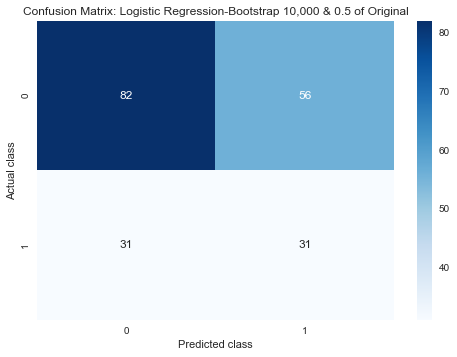

In [837]:
sns.heatmap(cfm_11, cmap="Blues", annot=True)
plt.title('Confusion Matrix: Logistic Regression-Bootstrap 10,000 & 0.5 of Original')
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.savefig('cfm_lr_bs10000_05.png')

## LR Classification Report

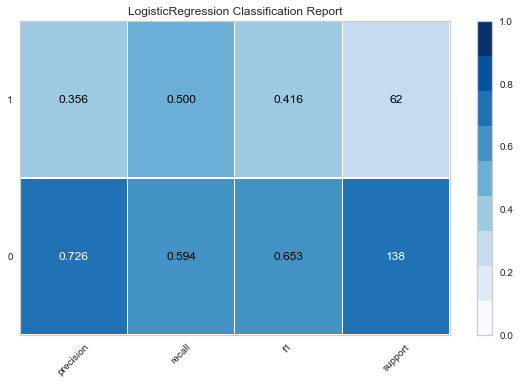

In [838]:
visualizer11 = ClassificationReport(bs10000_05lr, classes=classes, support=True,cmap='Blues')
visualizer11.fit(X5, y5)
visualizer11.score(X_test, y_test)
visualizer11.show()

## SVM (linear kernel function)

In [839]:
svm_clf_6 = SVC(kernel='linear', probability=True)

In [840]:
svm_clf_6.fit(X5,y5)
bs10000_05_pred_2 = svm_clf_6.predict(X_test)

## SVM prediction probability

In [841]:
accu12 = accuracy_score(y_test, bs10000_05_pred_2)
print("accuracy_score : ",accu12)

accuracy_score :  0.345


## Confusion Matrix

In [842]:
cfm_12 = confusion_matrix(y_test, bs10000_05_pred_2)
print (cfm_12)

[[  7 131]
 [  0  62]]


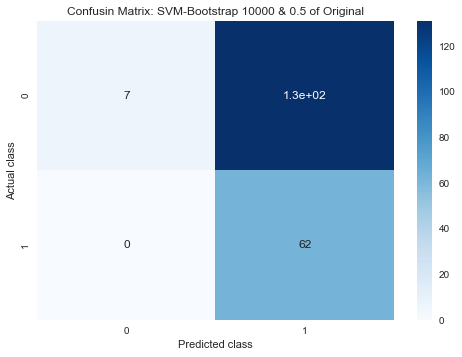

In [843]:
sns.heatmap(cfm_12, cmap="Blues", annot=True)
plt.title('Confusin Matrix: SVM-Bootstrap 10000 & 0.5 of Original')
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.savefig('cfm_svm_bs10000_05.png')

## SVM Classification Report

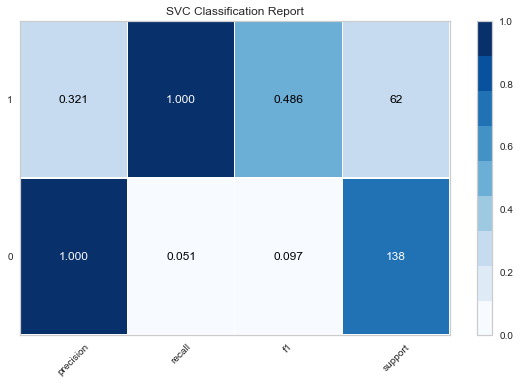

In [844]:
visualizer12 = ClassificationReport(svm_clf_6, classes=classes, support=True,cmap='Blues')
visualizer12.fit(X5, y5)
visualizer12.score(X_test, y_test)
visualizer12.show()

## Random Oversampling the minority class from the original dataset

In [535]:
ov_raw = transform_data_clean.copy()

## Seperate Minority & Majority class

In [536]:
bad_credit = ov_raw[ov_raw.classification==1]
good_credit = ov_raw[ov_raw.classification==0]

In [537]:
bad_credit.head(10)

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,classification,existingchecking_A11,existingchecking_A12,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202
1,48,5951,2,2,22,1,1,1,0,1,...,1,0,0,0,1,0,1,0,1,0
4,24,4870,3,4,53,2,2,1,1,0,...,0,1,0,0,1,0,1,0,1,0
9,30,5234,4,2,28,2,1,1,0,1,...,1,0,0,0,0,1,1,0,1,0
10,12,1295,3,1,25,1,1,1,0,1,...,0,0,0,0,1,0,1,0,1,0
11,48,4308,3,4,24,1,1,1,1,0,...,0,0,0,0,1,0,1,0,1,0
13,24,1199,4,4,60,2,1,1,1,0,...,1,0,0,1,0,0,1,0,1,0
15,24,1282,4,2,32,1,1,1,1,0,...,1,0,0,1,0,0,1,0,1,0
18,24,12579,4,2,44,1,1,1,0,1,...,0,1,0,0,0,1,0,1,1,0
29,60,6836,3,4,63,2,1,1,1,0,...,1,0,0,0,1,0,0,1,1,0
35,45,4746,4,2,25,2,1,1,0,1,...,1,0,0,1,0,0,1,0,1,0


In [538]:
bad_credit_oversample = resample(bad_credit, replace=True, n_samples=len(good_credit))

In [539]:
oversample = pd.concat([good_credit,bad_credit_oversample])

In [540]:
oversample.head(5)

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,classification,existingchecking_A11,existingchecking_A12,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202
0,6,1169,4,4,67,2,1,0,1,0,...,1,0,0,0,1,0,0,1,1,0
2,12,2096,2,3,49,1,2,0,0,0,...,1,0,0,1,0,0,1,0,1,0
3,42,7882,2,4,45,1,2,0,1,0,...,0,1,0,0,1,0,1,0,1,0
5,36,9055,2,4,35,1,2,0,0,0,...,0,1,0,1,0,0,0,1,1,0
6,24,2835,3,4,53,1,1,0,0,0,...,1,0,0,0,1,0,1,0,1,0


1    700
0    700
Name: classification, dtype: int64


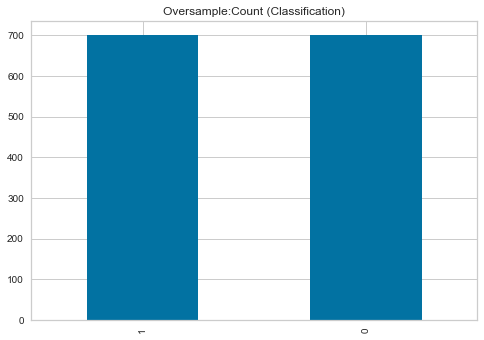

In [541]:
oversample.classification.value_counts().plot(kind='bar', title='Oversample:Count (Classification)')

print(oversample.classification.value_counts())

In [549]:
ov_mm = pd.DataFrame(min_max_scaler.fit_transform(oversample[['duration', 'creditamount','installmentrate', 
                                                              'pre_residencesince', 'age', 'existingcredits', 'peopleliable', 'classification']]),
                                                 index=oversample.index)
ov_mm.columns = ['duration', 'creditamount','installmentrate', 'pre_residencesince',
                       'age', 'existingcredits', 'peopleliable', 'classification']

In [550]:
oversample.drop(['duration', 'creditamount','installmentrate', 'pre_residencesince',
                       'age', 'existingcredits', 'peopleliable','classification'], axis=1, inplace=True)

In [551]:
ov_mm.head(5)

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,classification
0,0.029412,0.050567,1.000000,1.000000,0.857143,0.333333,0.0,0.0
2,0.117647,0.101574,0.333333,0.666667,0.535714,0.000000,1.0,0.0
3,0.558824,0.419941,0.333333,1.000000,0.464286,0.000000,1.0,0.0
5,0.470588,0.484483,0.333333,1.000000,0.285714,0.000000,1.0,0.0
6,0.294118,0.142236,0.666667,1.000000,0.607143,0.000000,0.0,0.0


In [552]:
ov_df = pd.concat([ov_mm, oversample],axis=1)

In [553]:
ov_df.describe()

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,classification,existingchecking_A11,existingchecking_A12,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,...,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,0.268782,0.179518,0.675000,0.612857,0.293151,0.132381,0.160000,0.500000,0.340000,0.284286,...,0.678571,0.126429,0.023571,0.201429,0.617857,0.157143,0.605714,0.394286,0.970714,0.029286
std,0.189635,0.173552,0.368324,0.371051,0.207100,0.194269,0.366737,0.500179,0.473878,0.451235,...,0.467192,0.332450,0.151764,0.401211,0.486085,0.364065,0.488871,0.488871,0.168666,0.168666
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.117647,0.060292,0.333333,0.333333,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.205882,0.115880,0.666667,0.666667,0.250000,0.000000,0.000000,0.500000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,0.382353,0.236134,1.000000,1.000000,0.410714,0.333333,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [555]:
ov_df.classification.value_counts()

1.0    700
0.0    700
Name: classification, dtype: int64

In [556]:
ov_df.to_csv(r'C:\Users\Drago\Desktop\over_ori.csv', index = False, header=True)

In [845]:
X6 = ov_df.drop('classification', axis = 1)
y6 = ov_df['classification']

In [847]:
ovlr = LogisticRegression(class_weight=None, random_state=10, max_iter=1000)
ovlr.fit(X6,y6)
ov_pred = ovlr.predict(X_test)

## LR prediction probability

In [848]:
accu13 = accuracy_score(y_test, ov_pred)
print("accuracy_score : ",accu13)

accuracy_score :  0.76


## Confusion Matrix

In [849]:
cfm_13 = confusion_matrix(y_test, ov_pred)
print (cfm_13)

[[102  36]
 [ 12  50]]


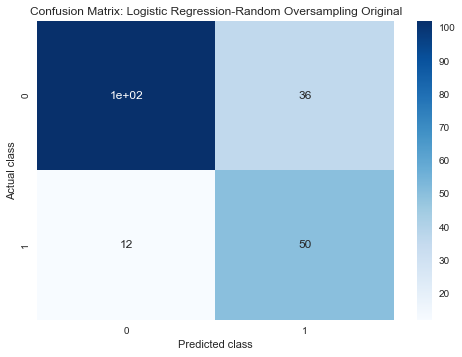

In [850]:
sns.heatmap(cfm_13, cmap="Blues", annot=True)
plt.title('Confusion Matrix: Logistic Regression-Random Oversampling Original')
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.savefig('cfm_lr_ov.png')

## LR Classification Report

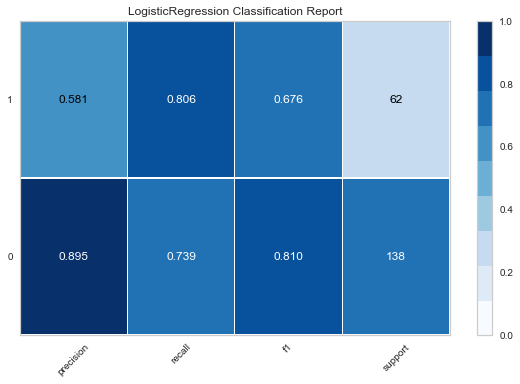

In [851]:
visualizer13 = ClassificationReport(ovlr, classes=classes, support=True,cmap='Blues')
visualizer13.fit(X6, y6)
visualizer13.score(X_test, y_test)
visualizer13.show()

## SVM (linear kernel function)

In [852]:
svm_clf_7 = SVC(kernel='linear', probability=True)

In [853]:
svm_clf_7.fit(X6,y6)
ov_pred2 = svm_clf_7.predict(X_test)

## SVM prediction probability

In [854]:
accu14 = accuracy_score(y_test, ov_pred2)
print("accuracy_score : ",accu14)

accuracy_score :  0.75


## Confusion Matrix

In [855]:
cfm_14 = confusion_matrix(y_test, ov_pred2)
print (cfm_14)

[[101  37]
 [ 13  49]]


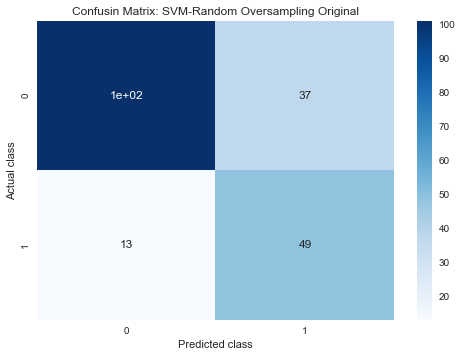

In [856]:
sns.heatmap(cfm_14, cmap="Blues", annot=True)
plt.title('Confusin Matrix: SVM-Random Oversampling Original')
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.savefig('cfm_svm_over.png')

## SVM Classification Report

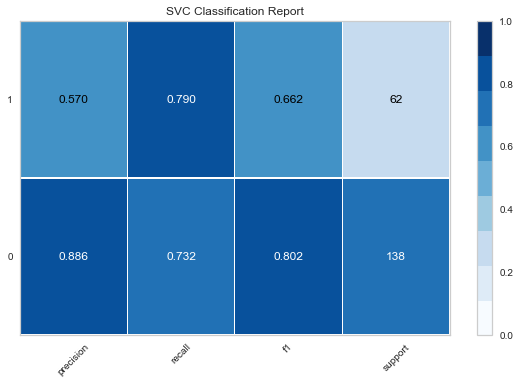

In [857]:
visualizer14 = ClassificationReport(svm_clf_7, classes=classes, support=True,cmap='Blues')
visualizer14.fit(X6, y6)
visualizer14.score(X_test, y_test)
visualizer14.show()

## Undersampling the majority class from the Original

In [572]:
u_raw = transform_data_clean.copy()

## Seperate Minority & Majority class

In [574]:
bad_credit2 = u_raw[u_raw.classification==1]
good_credit2 = u_raw[u_raw.classification==0]

In [576]:
good_credit_undersample = resample(good_credit2, replace=True, n_samples=len(bad_credit2))

In [577]:
undersample = pd.concat([good_credit_undersample,bad_credit2])

In [578]:
undersample.head(5)

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,classification,existingchecking_A11,existingchecking_A12,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202
845,21,3976,2,3,35,1,1,0,0,1,...,1,0,0,0,1,0,0,1,1,0
488,10,1418,3,2,35,1,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
160,24,2872,3,4,36,1,2,0,0,0,...,1,0,0,0,1,0,0,1,1,0
217,36,3913,2,2,23,1,1,0,0,0,...,1,0,0,0,1,0,0,1,1,0
276,18,2404,2,2,26,2,1,0,0,0,...,1,0,0,0,1,0,1,0,1,0


1    300
0    300
Name: classification, dtype: int64


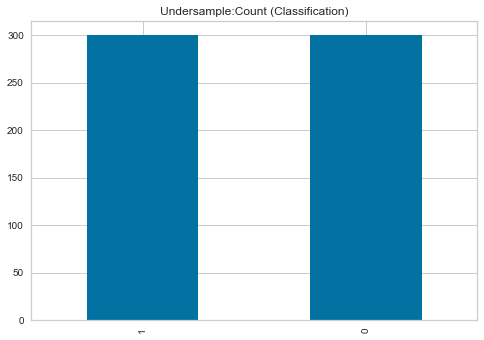

In [579]:
undersample.classification.value_counts().plot(kind='bar', title='Undersample:Count (Classification)')

print(undersample.classification.value_counts())

In [580]:
u_mm = pd.DataFrame(min_max_scaler.fit_transform(undersample[['duration', 'creditamount','installmentrate', 
                                                              'pre_residencesince', 'age', 'existingcredits', 'peopleliable', 'classification']]),
                                                 index=undersample.index)
u_mm.columns = ['duration', 'creditamount','installmentrate', 'pre_residencesince',
                       'age', 'existingcredits', 'peopleliable', 'classification']

In [581]:
undersample.drop(['duration', 'creditamount','installmentrate', 'pre_residencesince',
                       'age', 'existingcredits', 'peopleliable','classification'], axis=1, inplace=True)

In [582]:
u_mm.head(5)

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,classification
845,0.250000,0.201150,0.333333,0.666667,0.285714,0.000000,0.0,0.0
488,0.088235,0.059715,0.666667,0.333333,0.285714,0.000000,0.0,0.0
160,0.294118,0.140108,0.666667,1.000000,0.303571,0.000000,1.0,0.0
217,0.470588,0.197667,0.333333,0.333333,0.071429,0.000000,0.0,0.0
276,0.205882,0.114232,0.333333,0.333333,0.125000,0.333333,0.0,0.0


In [583]:
u_df = pd.concat([u_mm, undersample],axis=1)

In [584]:
u_df.describe()

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,classification,existingchecking_A11,existingchecking_A12,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,...,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.260417,0.171128,0.663889,0.603889,0.284583,0.135556,0.156667,0.500000,0.336667,0.290000,...,0.678333,0.121667,0.026667,0.183333,0.631667,0.158333,0.581667,0.418333,0.975000,0.025000
std,0.180906,0.169129,0.374220,0.368918,0.212113,0.194896,0.363789,0.500417,0.472964,0.454141,...,0.467506,0.327173,0.161242,0.387262,0.482755,0.365358,0.493697,0.493697,0.156255,0.156255
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.117647,0.055609,0.333333,0.333333,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.205882,0.111384,0.666667,0.666667,0.232143,0.000000,0.000000,0.500000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,0.305147,0.211103,1.000000,1.000000,0.410714,0.333333,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [585]:
u_df.classification.value_counts()

1.0    300
0.0    300
Name: classification, dtype: int64

In [586]:
u_df.to_csv(r'C:\Users\Drago\Desktop\under_ori.csv', index = False, header=True)

In [858]:
X7 = u_df.drop('classification', axis = 1)
y7 = u_df['classification']

In [859]:
ulr = LogisticRegression(class_weight=None, random_state=10, max_iter=1000)
ulr.fit(X7,y7)
u_pred = ulr.predict(X_test)

## LR prediction probability

In [860]:
accu15 = accuracy_score(y_test, u_pred)
print("accuracy_score : ",accu15)

accuracy_score :  0.745


## Confusion Matrix

In [861]:
cfm_15 = confusion_matrix(y_test, u_pred)
print (cfm_15)

[[98 40]
 [11 51]]


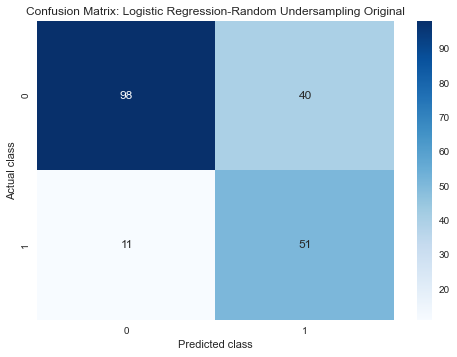

In [862]:
sns.heatmap(cfm_15, cmap="Blues", annot=True)
plt.title('Confusion Matrix: Logistic Regression-Random Undersampling Original')
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.savefig('cfm_lr_u.png')

## LR Classification Report

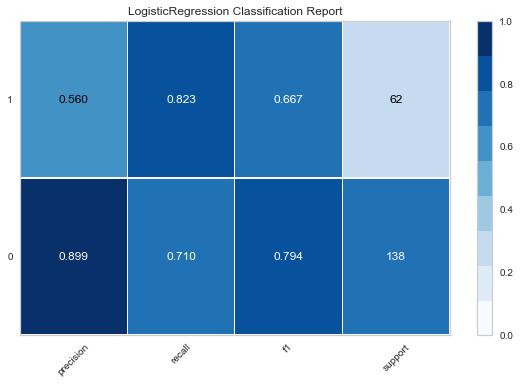

In [863]:
visualizer15 = ClassificationReport(ulr, classes=classes, support=True,cmap='Blues')
visualizer15.fit(X7, y7)
visualizer15.score(X_test, y_test)
visualizer15.show()

## SVM (linear kernel function)

In [864]:
svm_clf_8 = SVC(kernel='linear', probability=True)

In [865]:
svm_clf_8.fit(X7,y7)
u_pred2 = svm_clf_8.predict(X_test)

## SVM prediction probability

In [866]:
accu16 = accuracy_score(y_test, u_pred2)
print("accuracy_score : ",accu16)

accuracy_score :  0.735


## Confusion Matrix

In [867]:
cfm_16 = confusion_matrix(y_test, u_pred2)
print (cfm_16)

[[96 42]
 [11 51]]


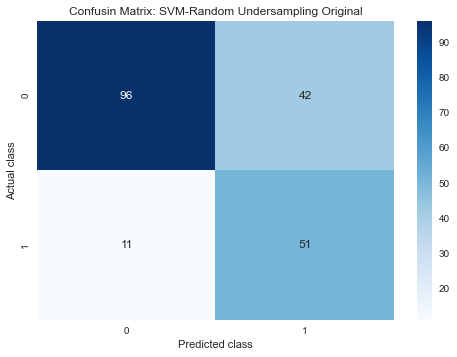

In [868]:
sns.heatmap(cfm_16, cmap="Blues", annot=True)
plt.title('Confusin Matrix: SVM-Random Undersampling Original')
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.savefig('cfm_svm_under.png')

## SVM Classification Report

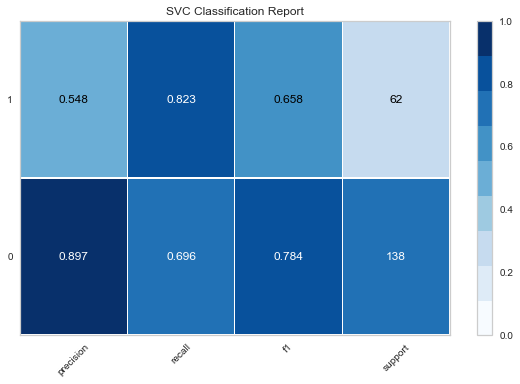

In [869]:
visualizer16 = ClassificationReport(svm_clf_8, classes=classes, support=True,cmap='Blues')
visualizer16.fit(X7, y7)
visualizer16.score(X_test, y_test)
visualizer16.show()

## Adding Noise on numercial variables to Original set

In [599]:
transform_data_clean.describe()

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,classification,existingchecking_A11,existingchecking_A12,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.300000,0.274000,0.269000,...,0.713000,0.108000,0.022000,0.2000,0.630000,0.148000,0.596000,0.404000,0.963000,0.037000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487,0.446232,0.443662,...,0.452588,0.310536,0.146757,0.4002,0.483046,0.355278,0.490943,0.490943,0.188856,0.188856
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.0000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.0000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [661]:
noise = transform_data_clean.copy()

In [662]:
mean_d, std_d = 20.903000, 12.058814
mean_c, std_c = 3271.258000, 2822.736876
mean_i, std_i = 2.973000, 1.118715
mean_p, std_p = 2.845000, 1.103718
mean_a, std_a = 35.546000, 11.375469
mean_e, std_e = 1.407000, 0.577654
mean_pe, std_pe = 1.155000, 0.362086

d_noise = np.random.normal(mean_d, std_d, [1000,1])
c_noise = np.random.normal(mean_c, std_c, [1000,1])
i_noise = np.random.normal(mean_i, std_i, [1000,1])
p_noise = np.random.normal(mean_p, std_p, [1000,1])
a_noise = np.random.normal(mean_a, std_a, [1000,1])
e_noise = np.random.normal(mean_e, std_e, [1000,1])
pe_noise = np.random.normal(mean_pe, std_pe, [1000,1])

In [663]:
clean_signal_d = pd.DataFrame(data=noise, index=noise.index, columns=['duration'])
clean_signal_c = pd.DataFrame(data=noise, index=noise.index, columns=['creditamount'])
clean_signal_i = pd.DataFrame(data=noise, index=noise.index, columns=['installmentrate'])
clean_signal_p = pd.DataFrame(data=noise, index=noise.index, columns=['pre_residencesince'])
clean_signal_a = pd.DataFrame(data=noise, index=noise.index, columns=['age'])
clean_signal_e = pd.DataFrame(data=noise, index=noise.index, columns=['existingcredits'])
clean_signal_pe = pd.DataFrame(data=noise, index=noise.index, columns=['peopleliable'])

In [664]:
duration_n = clean_signal_d + d_noise
creditamount_n = clean_signal_c + c_noise
installmentrate_n = clean_signal_i + i_noise
pre_residencesince_n = clean_signal_p + p_noise
age_n = clean_signal_a + a_noise
existingcredits_n = clean_signal_e + e_noise
peopleliable_n = clean_signal_pe + pe_noise

In [665]:
noise_or = pd.concat([duration_n, creditamount_n, installmentrate_n, pre_residencesince_n, 
                           age_n,existingcredits_n,peopleliable_n],axis=1)

In [666]:
noise_or.describe()

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.771599,6677.841062,5.992554,5.688796,71.726819,2.835623,2.293524
std,16.940927,3989.819323,1.559593,1.557554,16.412644,0.834726,0.505372
min,-1.630786,-3828.390104,1.247037,0.662703,24.137002,0.758477,0.799334
25%,29.847459,4008.133860,4.932508,4.606794,59.973307,2.263999,1.947408
50%,41.083382,6280.928288,6.110014,5.720737,70.499556,2.782758,2.216353
75%,52.960182,8848.645815,7.113279,6.832197,82.277970,3.336973,2.538836
max,93.595127,25535.943232,10.113812,9.769682,132.211615,6.342215,3.898857


In [667]:
noise.head(5)

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,classification,existingchecking_A11,existingchecking_A12,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202
0,6,1169,4,4,67,2,1,0,1,0,...,1,0,0,0,1,0,0,1,1,0
1,48,5951,2,2,22,1,1,1,0,1,...,1,0,0,0,1,0,1,0,1,0
2,12,2096,2,3,49,1,2,0,0,0,...,1,0,0,1,0,0,1,0,1,0
3,42,7882,2,4,45,1,2,0,1,0,...,0,1,0,0,1,0,1,0,1,0
4,24,4870,3,4,53,2,2,1,1,0,...,0,1,0,0,1,0,1,0,1,0


In [668]:
noise_or.head(5)

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable
0,23.416458,4491.536163,7.019923,7.776145,90.297557,3.302724,2.800249
1,73.721397,5342.179129,4.790779,4.148159,34.157461,2.036764,2.169032
2,38.387026,4811.393114,5.503168,7.733408,97.195440,2.606929,3.097546
3,57.882407,14762.530049,7.316941,5.511450,82.934860,1.802738,3.074984
4,45.956789,7856.269208,6.389641,5.465687,106.116645,3.895314,3.643158


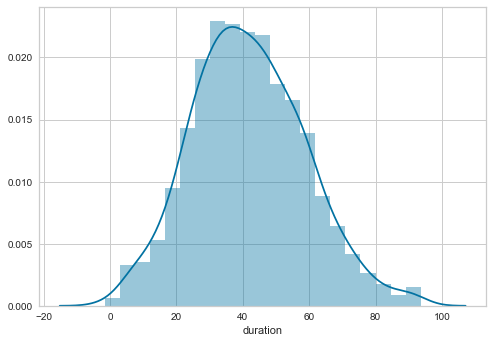

In [669]:
sns.distplot(noise_or['duration'])

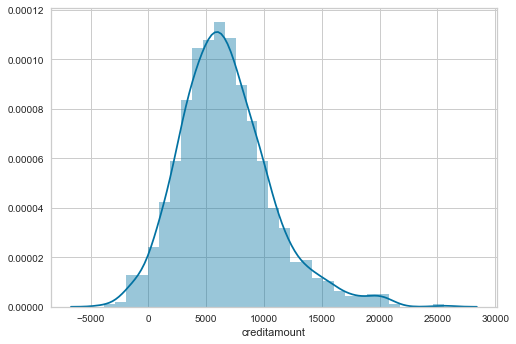

In [670]:
sns.distplot(noise_or['creditamount'])

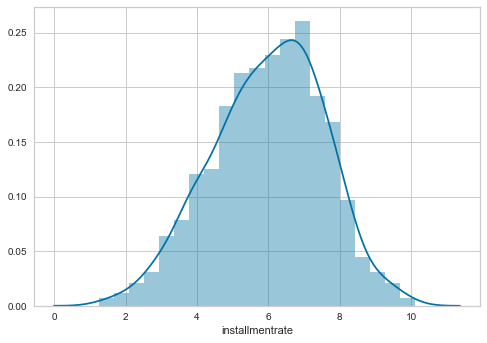

In [671]:
sns.distplot(noise_or['installmentrate'])

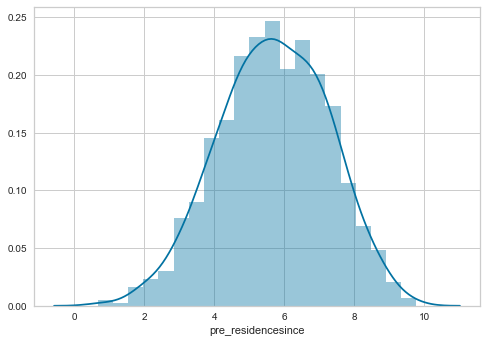

In [672]:
sns.distplot(noise_or['pre_residencesince'])

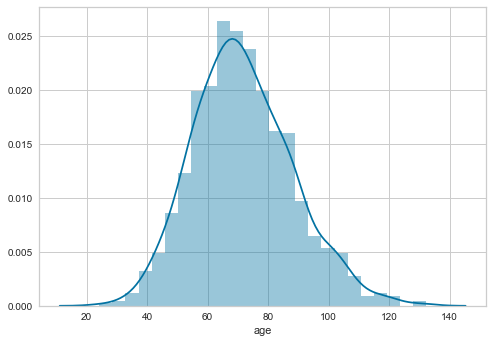

In [673]:
sns.distplot(noise_or['age'])

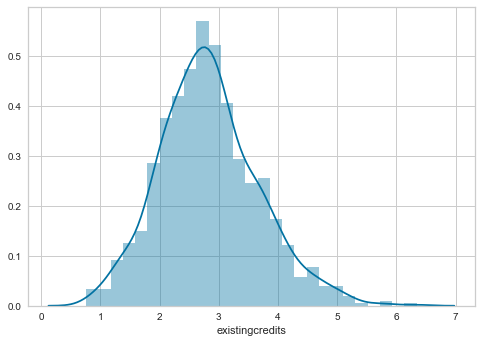

In [674]:
sns.distplot(noise_or['existingcredits'])

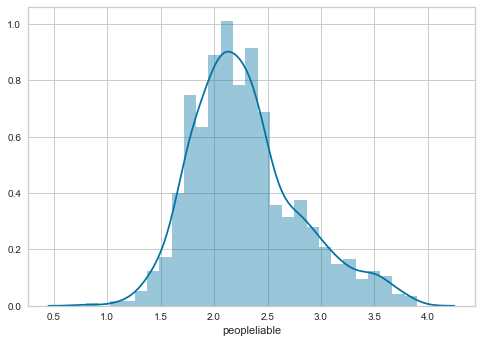

In [675]:
sns.distplot(noise_or['peopleliable'])

In [678]:
noise.drop(['duration', 'creditamount','installmentrate', 'pre_residencesince',
                       'age', 'existingcredits', 'peopleliable'], axis=1, inplace=True)

In [681]:
noise_com = pd.concat([noise_or, noise],axis=1)

In [682]:
noise_com.head(10)

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,classification,existingchecking_A11,existingchecking_A12,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202
0,23.416458,4491.536163,7.019923,7.776145,90.297557,3.302724,2.800249,0,1,0,...,1,0,0,0,1,0,0,1,1,0
1,73.721397,5342.179129,4.790779,4.148159,34.157461,2.036764,2.169032,1,0,1,...,1,0,0,0,1,0,1,0,1,0
2,38.387026,4811.393114,5.503168,7.733408,97.195440,2.606929,3.097546,0,0,0,...,1,0,0,1,0,0,1,0,1,0
3,57.882407,14762.530049,7.316941,5.511450,82.934860,1.802738,3.074984,0,1,0,...,0,1,0,0,1,0,1,0,1,0
4,45.956789,7856.269208,6.389641,5.465687,106.116645,3.895314,3.643158,1,1,0,...,0,1,0,0,1,0,1,0,1,0
5,59.157137,10614.466723,5.442402,4.959377,56.403513,2.682522,3.431583,0,0,0,...,0,1,0,1,0,0,0,1,1,0
6,49.538809,6110.523977,7.371354,9.004498,82.345919,2.472998,2.253938,0,0,0,...,1,0,0,0,1,0,1,0,1,0
7,79.482057,12275.449442,5.058629,2.496644,58.547602,2.073781,2.460744,0,0,1,...,0,0,0,0,0,1,0,1,1,0
8,30.750673,3531.973420,3.752285,7.049744,91.912867,1.353858,1.809429,0,0,0,...,1,0,0,1,0,0,1,0,1,0
9,47.471830,4837.364313,6.387886,4.027348,68.636421,2.024915,2.077558,1,0,1,...,1,0,0,0,0,1,1,0,1,0


In [683]:
n_mm = pd.DataFrame(min_max_scaler.fit_transform(noise_com[['duration', 'creditamount','installmentrate', 
                                                              'pre_residencesince', 'age', 'existingcredits', 'peopleliable', 'classification']]),
                                                 index=noise_com.index)
n_mm.columns = ['duration', 'creditamount','installmentrate', 'pre_residencesince',
                       'age', 'existingcredits', 'peopleliable', 'classification']

In [684]:
noise_com.drop(['duration', 'creditamount','installmentrate', 'pre_residencesince',
                       'age', 'existingcredits', 'peopleliable','classification'], axis=1, inplace=True)

In [685]:
n_mm.head(5)

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,classification
0,0.263030,0.283334,0.651069,0.781098,0.612175,0.455653,0.645556,0.0
1,0.791299,0.312303,0.399665,0.382724,0.092718,0.228930,0.441906,1.0
2,0.420241,0.294227,0.480009,0.776405,0.676000,0.331042,0.741473,0.0
3,0.624968,0.633112,0.684567,0.532421,0.544049,0.187018,0.734194,0.0
4,0.499733,0.397920,0.579986,0.527396,0.758547,0.561781,0.917504,1.0


In [687]:
n_df = pd.concat([n_mm, noise_com],axis=1)

In [693]:
n_df.describe()

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,classification,existingchecking_A11,existingchecking_A12,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.455783,0.357789,0.535202,0.551895,0.440342,0.371999,0.482071,0.300000,0.274000,0.269000,...,0.713000,0.108000,0.022000,0.2000,0.630000,0.148000,0.596000,0.404000,0.963000,0.037000
std,0.177902,0.135873,0.175892,0.171029,0.151864,0.149492,0.163048,0.458487,0.446232,0.443662,...,0.452588,0.310536,0.146757,0.4002,0.483046,0.355278,0.490943,0.490943,0.188856,0.188856
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.330564,0.266872,0.415650,0.433084,0.331589,0.269626,0.370403,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.448556,0.344272,0.548449,0.555402,0.428987,0.362532,0.457173,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.0000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,0.573278,0.431715,0.661598,0.677447,0.537971,0.461787,0.561216,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.0000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [694]:
n_df.classification.value_counts()

0.0    700
1.0    300
Name: classification, dtype: int64

In [586]:
n_df.to_csv(r'C:\Users\Drago\Desktop\noise_ori.csv', index = False, header=True)

In [870]:
X8 = n_df.drop('classification', axis = 1)
y8 = n_df['classification']

In [871]:
nlr = LogisticRegression(class_weight=None, random_state=10, max_iter=1000)
nlr.fit(X8,y8)
n_pred = nlr.predict(X_test)

## LR prediction probability

In [872]:
accu17 = accuracy_score(y_test, n_pred)
print("accuracy_score : ",accu17)

accuracy_score :  0.76


## Confusion Matrix

In [873]:
cfm_17 = confusion_matrix(y_test, n_pred)
print (cfm_17)

[[132   6]
 [ 42  20]]


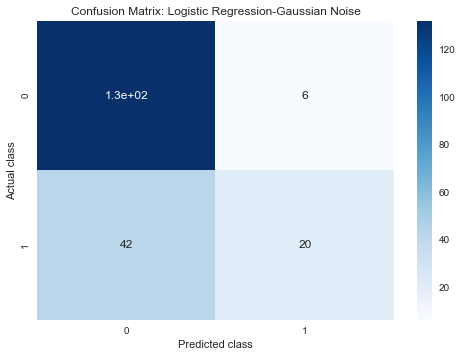

In [874]:
sns.heatmap(cfm_17, cmap="Blues", annot=True)
plt.title('Confusion Matrix: Logistic Regression-Gaussian Noise')
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.savefig('cfm_lr_n.png')

## LR Classification Report

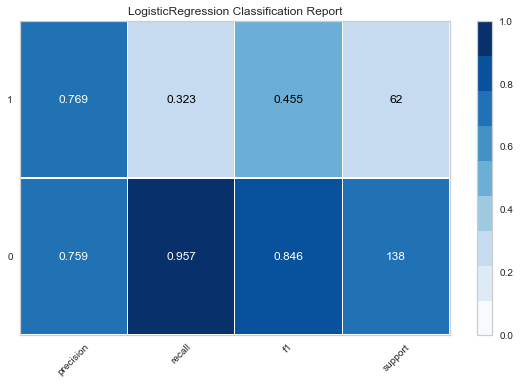

In [875]:
visualizer17 = ClassificationReport(nlr, classes=classes, support=True,cmap='Blues')
visualizer17.fit(X8, y8)
visualizer17.score(X_test, y_test)
visualizer17.show()

## SVM (linear kernel function)

In [876]:
svm_clf_9 = SVC(kernel='linear', probability=True)

In [877]:
svm_clf_9.fit(X8,y8)
n_pred2 = svm_clf_9.predict(X_test)

## SVM prediction probability

In [878]:
accu18 = accuracy_score(y_test, n_pred2)
print("accuracy_score : ",accu18)

accuracy_score :  0.765


## Confusion Matrix

In [879]:
cfm_18 = confusion_matrix(y_test, n_pred2)
print (cfm_18)

[[129   9]
 [ 38  24]]


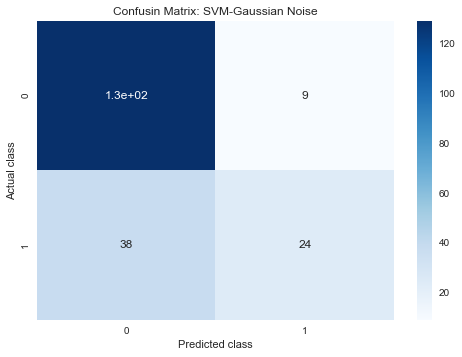

In [880]:
sns.heatmap(cfm_18, cmap="Blues", annot=True)
plt.title('Confusin Matrix: SVM-Gaussian Noise')
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.savefig('cfm_svm_n.png')

## SVM Classification Report

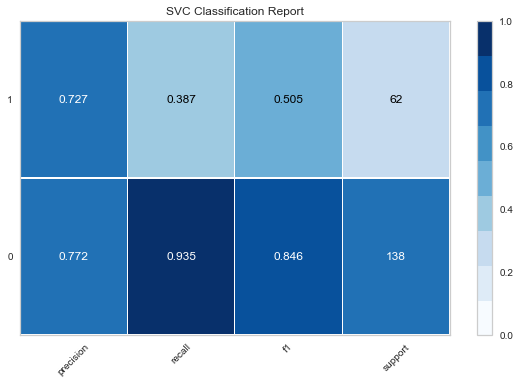

In [881]:
visualizer18 = ClassificationReport(svm_clf_9, classes=classes, support=True,cmap='Blues')
visualizer18.fit(X8, y8)
visualizer18.score(X_test, y_test)
visualizer18.show()